In [3]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import backend as K
import matplotlib.pyplot as plt
import vtk 
from vtk.util import numpy_support as VN
import matplotlib.tri as tri

2023-10-25 16:27:40.178017: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-25 16:27:41.197981: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [4]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [5]:
path = ["CNN Data/M2/150_GUp_Z_0.031250", 
       "CNN Data/M2/151_GUp_Z_0.031250",
       "CNN Data/M2/152_GUp_Z_0.031250",
       "CNN Data/M2/153_GUp_Z_0.031250",
       "CNN Data/M2/154_GUp_Z_0.031250",
       "CNN Data/M2/155_GUp_Z_0.031250",
       "CNN Data/M2/156_GUp_Z_0.031250",
       "CNN Data/M2/157_GUp_Z_0.031250",
       "CNN Data/M2/158_GUp_Z_0.031250",
       "CNN Data/M2/159_GUp_Z_0.031250",
       "CNN Data/M2/160_GUp_Z_0.031250",
       "CNN Data/M2/150_GUp_Z_N-0.031250",
       "CNN Data/M2/151_GUp_Z_N-0.031250",
       "CNN Data/M2/152_GUp_Z_N-0.031250",
       "CNN Data/M2/153_GUp_Z_N-0.031250",
       "CNN Data/M2/154_GUp_Z_N-0.031250",
       "CNN Data/M2/155_GUp_Z_N-0.031250",
       "CNN Data/M2/156_GUp_Z_N-0.031250",
       "CNN Data/M2/157_GUp_Z_N-0.031250",
       "CNN Data/M2/158_GUp_Z_N-0.031250",
       "CNN Data/M2/159_GUp_Z_N-0.031250",
       "CNN Data/M2/160_GUp_Z_N-0.031250",
       "CNN Data/M2/161_GUp_Z_N-0.031250",
       "CNN Data/M2/162_GUp_Z_N-0.031250",
       "CNN Data/M2/163_GUp_Z_N-0.031250",
       "CNN Data/M2/164_GUp_Z_N-0.031250",
       "CNN Data/M2/165_GUp_Z_N-0.031250",
       "CNN Data/M2/166_GUp_Z_N-0.031250",
       "CNN Data/M2/167_GUp_Z_N-0.031250",
       "CNN Data/M2/168_GUp_Z_N-0.031250",
       "CNN Data/M2/169_GUp_Z_N-0.031250",
       "CNN Data/M2/170_GUp_Z_N-0.031250",
       "CNN Data/M2/150_GUp_Z_0.093750",
       "CNN Data/M2/151_GUp_Z_0.093750",
       "CNN Data/M2/152_GUp_Z_0.093750",
       "CNN Data/M2/153_GUp_Z_0.093750",
       "CNN Data/M2/154_GUp_Z_0.093750",
       "CNN Data/M2/155_GUp_Z_0.093750",
       "CNN Data/M2/156_GUp_Z_0.093750",
       "CNN Data/M2/157_GUp_Z_0.093750",
       "CNN Data/M2/158_GUp_Z_0.093750",
       "CNN Data/M2/159_GUp_Z_0.093750",
       "CNN Data/M2/160_GUp_Z_0.093750",
       "CNN Data/M2/161_GUp_Z_0.093750",
       "CNN Data/M2/162_GUp_Z_0.093750",
       "CNN Data/M2/163_GUp_Z_0.093750",
       "CNN Data/M2/164_GUp_Z_0.093750",
       "CNN Data/M2/165_GUp_Z_0.093750",
       "CNN Data/M2/166_GUp_Z_0.093750",
       "CNN Data/M2/167_GUp_Z_0.093750",
       "CNN Data/M2/168_GUp_Z_0.093750",
       "CNN Data/M2/169_GUp_Z_0.093750",
       "CNN Data/M2/170_GUp_Z_0.093750",
       "CNN Data/M2/150_GUp_Z_N-0.093750",
       "CNN Data/M2/151_GUp_Z_N-0.093750",
       "CNN Data/M2/152_GUp_Z_N-0.093750",
       "CNN Data/M2/153_GUp_Z_N-0.093750",
       "CNN Data/M2/154_GUp_Z_N-0.093750",
       "CNN Data/M2/155_GUp_Z_N-0.093750",
       "CNN Data/M2/156_GUp_Z_N-0.093750",
       "CNN Data/M2/157_GUp_Z_N-0.093750",
       "CNN Data/M2/158_GUp_Z_N-0.093750",
       "CNN Data/M2/159_GUp_Z_N-0.093750",
       "CNN Data/M2/160_GUp_Z_N-0.093750",
       "CNN Data/M2/161_GUp_Z_N-0.093750",
       "CNN Data/M2/162_GUp_Z_N-0.093750",
       "CNN Data/M2/163_GUp_Z_N-0.093750",
       "CNN Data/M2/164_GUp_Z_N-0.093750",
       "CNN Data/M2/165_GUp_Z_N-0.093750",
       "CNN Data/M2/166_GUp_Z_N-0.093750",
       "CNN Data/M2/167_GUp_Z_N-0.093750",
       "CNN Data/M2/168_GUp_Z_N-0.093750",
       "CNN Data/M2/169_GUp_Z_N-0.093750",
       "CNN Data/M2/170_GUp_Z_N-0.093750",
       "CNN Data/M2/150_GUp_Z_0.156250",
       "CNN Data/M2/151_GUp_Z_0.156250",
       "CNN Data/M2/152_GUp_Z_0.156250",
       "CNN Data/M2/153_GUp_Z_0.156250",
       "CNN Data/M2/154_GUp_Z_0.156250",
       "CNN Data/M2/155_GUp_Z_0.156250",
       "CNN Data/M2/156_GUp_Z_0.156250",
       "CNN Data/M2/157_GUp_Z_0.156250",
       "CNN Data/M2/158_GUp_Z_0.156250",
       "CNN Data/M2/159_GUp_Z_0.156250",
       "CNN Data/M2/160_GUp_Z_0.156250",
       "CNN Data/M2/161_GUp_Z_0.156250",
       "CNN Data/M2/162_GUp_Z_0.156250",
       "CNN Data/M2/163_GUp_Z_0.156250",
       "CNN Data/M2/164_GUp_Z_0.156250",
       "CNN Data/M2/165_GUp_Z_0.156250",
       "CNN Data/M2/166_GUp_Z_0.156250",
       "CNN Data/M2/167_GUp_Z_0.156250",
       "CNN Data/M2/168_GUp_Z_0.156250",
       "CNN Data/M2/169_GUp_Z_0.156250",
       "CNN Data/M2/170_GUp_Z_0.156250",
       "CNN Data/M2/150_GUp_Z_N-0.156250",
       "CNN Data/M2/151_GUp_Z_N-0.156250",
       "CNN Data/M2/152_GUp_Z_N-0.156250",
       "CNN Data/M2/153_GUp_Z_N-0.156250",
       "CNN Data/M2/154_GUp_Z_N-0.156250",
       "CNN Data/M2/155_GUp_Z_N-0.156250",
       "CNN Data/M2/156_GUp_Z_N-0.156250",
       "CNN Data/M2/157_GUp_Z_N-0.156250",
       "CNN Data/M2/158_GUp_Z_N-0.156250",
       "CNN Data/M2/159_GUp_Z_N-0.156250",
       "CNN Data/M2/160_GUp_Z_N-0.156250",
       "CNN Data/M2/161_GUp_Z_N-0.156250",
       "CNN Data/M2/162_GUp_Z_N-0.156250",
       "CNN Data/M2/163_GUp_Z_N-0.156250",
       "CNN Data/M2/164_GUp_Z_N-0.156250",
       "CNN Data/M2/165_GUp_Z_N-0.156250",
       "CNN Data/M2/166_GUp_Z_N-0.156250",
       "CNN Data/M2/167_GUp_Z_N-0.156250",
       "CNN Data/M2/168_GUp_Z_N-0.156250",
       "CNN Data/M2/169_GUp_Z_N-0.156250",
       "CNN Data/M2/170_GUp_Z_N-0.156250"]

nt = len(path)
nx = 256
ny = 128
nc = 13
nf = 12
nl = 1

In [6]:
nt

116

In [7]:
testPath = ['CNN Data/M2/150_GUp_Z_0.218750',
           'CNN Data/M2/151_GUp_Z_0.218750',
           'CNN Data/M2/152_GUp_Z_0.218750',
           'CNN Data/M2/153_GUp_Z_0.218750',
           'CNN Data/M2/154_GUp_Z_0.218750',
           'CNN Data/M2/155_GUp_Z_0.218750',
           'CNN Data/M2/156_GUp_Z_0.218750',
           'CNN Data/M2/157_GUp_Z_0.218750',
           'CNN Data/M2/158_GUp_Z_0.218750',
           'CNN Data/M2/159_GUp_Z_0.218750',
           'CNN Data/M2/160_GUp_Z_0.218750',
           'CNN Data/M2/161_GUp_Z_0.218750',
           'CNN Data/M2/162_GUp_Z_0.218750',
           'CNN Data/M2/163_GUp_Z_0.218750',
           'CNN Data/M2/164_GUp_Z_0.218750',
           'CNN Data/M2/165_GUp_Z_0.218750',
           'CNN Data/M2/166_GUp_Z_0.218750',
           'CNN Data/M2/167_GUp_Z_0.218750',
           'CNN Data/M2/168_GUp_Z_0.218750',
           'CNN Data/M2/169_GUp_Z_0.218750',
           'CNN Data/M2/170_GUp_Z_0.218750']
nt_test = len(testPath)

In [8]:
data = np.zeros([nt, nx, ny, nc])

for t in range(nt):
    with open(path[t], "r") as f:
        f.readline()
        for j in range(ny):
            l = f.readline().split('\t')
            for i in range(nx):
                for c in range(nc):
                    data[t, i, j, c] = l[i*nc+c]

In [ ]:
data_test = np.zeros([nt_test, nx, ny, nc])

for t in range(nt_test):
    with open(testPath[t], "r") as f:
        f.readline()
        for j in range(ny):
            l = f.readline().split('\t')
            for i in range(nx):
                for c in range(nc):
                    data_test[t, i, j, c] = l[i*nc+c]

In [ ]:
np.random.shuffle(data)

In [78]:
feats = np.zeros([nt, nx, ny, nf])
label = np.zeros([nt, nx, ny, nl])

for t in range(nt):
    for j in range(ny):
        for i in range(nx):
            for c in range(nc):
                if c<(nc-1):
                    feats[t, i, j, c] = data[t, i, j, c]
                else:
                    label[t, i, j, 0] = data[t, i, j,-1]   

In [79]:
feats_test = np.zeros([nt_test, nx, ny, nf])
label_test = np.zeros([nt_test, nx, ny, nl])

for t in range(nt_test):
    for j in range(ny):
        for i in range(nx):
            for c in range(nc):
                if c<(nc-1):
                    feats_test[t, i, j, c] = data_test[t, i, j, c]
                else:
                    label_test[t, i, j, 0] = data_test[t, i, j,-1]   

In [80]:
split = int(0.8 * nt)
x_train = feats[0:split,:,:,:]
y_train = label[0:split,:,:,:]

x_val = feats[split+1:,:,:,:]
y_val = label[split+1:,:,:,:]

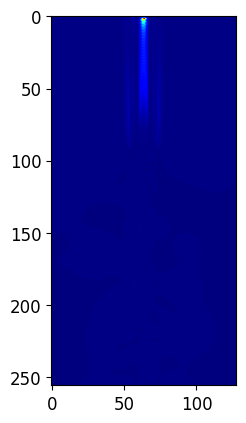

In [81]:
plt.imshow(label[1,:,:,0], cmap='jet')

In [82]:
print("Reading data:")
for i in range(nc):
    print(data[0, -1,-1,i])   
         
print("\nReading feats and label:")
for i in range(nc-1):
    print(feats[0, -1,-1,i])    
print(label[0, -1,-1,0])

Reading data:
-0.00048
8.3472e-06
0.00027472
0.0
0.000826397
-1.008e-06
9.22938e-06
-2.97308e-10
-4.62875e-06
6.70458e-09
-9.70599e-08
7.20921e-06
-0.00316752

Reading feats and label:
-0.00048
8.3472e-06
0.00027472
0.0
0.000826397
-1.008e-06
9.22938e-06
-2.97308e-10
-4.62875e-06
6.70458e-09
-9.70599e-08
7.20921e-06
-0.00316752


In [83]:
def CC(true, pred):
    true = tf.cast(true, tf.float32)
    pred = tf.cast(pred, tf.float32)
    cov = K.sum( (true - K.mean(true)) * (pred - K.mean(pred)) ) / ( len(true) - 1 )
    sigma = lambda y : np.sqrt(K.mean(K.square(y - K.mean(y))))
    return cov / ( sigma(true) * sigma(pred) )

In [84]:
def coeff_determination(y_true, y_pred):
    SS_res =  K.sum(K.square( y_true-y_pred ))
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) )
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

In [85]:
def Model(Nn, Nx, Ny, Nf, Nl, Nly):
    de = [1, 2, 4, 8, 16]
    model = tf.keras.models.Sequential()
    input_layer = tf.keras.layers.Input(shape=(nx, ny, nf))
    x = tf.keras.layers.Conv2D(int(Nn/de[0]), (3,3), activation='relu', padding='same')(input_layer)
    x = tf.keras.layers.MaxPooling2D((2,2), padding='same')(x)
    for i in range(1, Nly):
        x = tf.keras.layers.Conv2D(int(Nn/de[i]), (3,3), activation='relu', padding='same')(x)
        x = tf.keras.layers.MaxPooling2D((2,2), padding='same')(x)
    for i in range(1, Nly+1):
        x = tf.keras.layers.Conv2D(int(Nn/de[Nly-i]), (3,3), activation='relu', padding='same')(x)
        x = tf.keras.layers.UpSampling2D((2,2))(x)
    output_layer = tf.keras.layers.Conv2D(nl, (3,3), activation='linear', padding='same')(x)
    
    model = tf.keras.models.Model(input_layer, output_layer)
    adam = tf.keras.optimizers.legacy.Adam(learning_rate=0.001, beta_1=0.9, 
                                           beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=[coeff_determination])
    model._name = f'model_n_{Nn}_lay_{Nly}'
    
    return model

In [86]:
neuron = 256 #[32, 64, 128, 256]
layer = 5 #[2, 3, 4, 5]
checkpoints = tf.keras.callbacks.ModelCheckpoint(filepath='CNN_checkpoints/M2_weight-{epoch:02d}.h5', 
                                                  monitor='val_loss', 
                                                  verbose=1, 
                                                  save_best_only=True, 
                                                  mode='min')
model = Model(neuron, nx, ny, nf, nl, layer)
model.summary()
history_callback = model.fit(x_train, y_train, epochs=5000, batch_size=16, 
                            validation_data=[x_val, y_val], validation_batch_size=4, 
                            callbacks=[checkpoints])

Model: "model_n_256_lay_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 256, 128, 12)]    0         
                                                                 
 conv2d_44 (Conv2D)          (None, 256, 128, 256)     27904     
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 128, 64, 256)     0         
 g2D)                                                            
                                                                 
 conv2d_45 (Conv2D)          (None, 128, 64, 128)      295040    
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 64, 32, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_46 (Conv2D)          (None, 64, 32, 64)  

5/7 [====================>.........] - ETA: 0s - loss: 2.6873e-04 - coeff_determination: 0.9792
Epoch 40: val_loss did not improve from 0.00189
7/7 [==============================] - 0s 38ms/step - loss: 2.8172e-04 - coeff_determination: 0.9778 - val_loss: 0.0029 - val_coeff_determination: -0.7345
Epoch 41/5000
5/7 [====================>.........] - ETA: 0s - loss: 2.7543e-04 - coeff_determination: 0.9786
Epoch 41: val_loss did not improve from 0.00189
7/7 [==============================] - 0s 38ms/step - loss: 2.7233e-04 - coeff_determination: 0.9792 - val_loss: 0.0025 - val_coeff_determination: -0.4868
Epoch 42/5000
5/7 [====================>.........] - ETA: 0s - loss: 3.0947e-04 - coeff_determination: 0.9764
Epoch 42: val_loss did not improve from 0.00189
7/7 [==============================] - 0s 38ms/step - loss: 2.9633e-04 - coeff_determination: 0.9756 - val_loss: 0.0031 - val_coeff_determination: -0.8709
Epoch 43/5000
5/7 [====================>.........] - ETA: 0s - loss: 2.6132

5/7 [====================>.........] - ETA: 0s - loss: 1.6003e-04 - coeff_determination: 0.9878
Epoch 92: val_loss did not improve from 0.00189
7/7 [==============================] - 0s 38ms/step - loss: 1.6035e-04 - coeff_determination: 0.9872 - val_loss: 0.0032 - val_coeff_determination: -0.9143
Epoch 93/5000
5/7 [====================>.........] - ETA: 0s - loss: 1.6870e-04 - coeff_determination: 0.9866
Epoch 93: val_loss did not improve from 0.00189
7/7 [==============================] - 0s 39ms/step - loss: 1.7848e-04 - coeff_determination: 0.9858 - val_loss: 0.0034 - val_coeff_determination: -1.0216
Epoch 94/5000
5/7 [====================>.........] - ETA: 0s - loss: 1.8516e-04 - coeff_determination: 0.9854
Epoch 94: val_loss did not improve from 0.00189
7/7 [==============================] - 0s 38ms/step - loss: 1.8936e-04 - coeff_determination: 0.9858 - val_loss: 0.0040 - val_coeff_determination: -1.3850
Epoch 95/5000
5/7 [====================>.........] - ETA: 0s - loss: 1.9322

5/7 [====================>.........] - ETA: 0s - loss: 1.4316e-04 - coeff_determination: 0.9886
Epoch 144: val_loss did not improve from 0.00189
7/7 [==============================] - 0s 38ms/step - loss: 1.4209e-04 - coeff_determination: 0.9891 - val_loss: 0.0036 - val_coeff_determination: -1.1359
Epoch 145/5000
5/7 [====================>.........] - ETA: 0s - loss: 1.3568e-04 - coeff_determination: 0.9893
Epoch 145: val_loss did not improve from 0.00189
7/7 [==============================] - 0s 38ms/step - loss: 1.4094e-04 - coeff_determination: 0.9889 - val_loss: 0.0039 - val_coeff_determination: -1.3441
Epoch 146/5000
5/7 [====================>.........] - ETA: 0s - loss: 1.4861e-04 - coeff_determination: 0.9885
Epoch 146: val_loss did not improve from 0.00189
7/7 [==============================] - 0s 38ms/step - loss: 1.4321e-04 - coeff_determination: 0.9892 - val_loss: 0.0031 - val_coeff_determination: -0.8351
Epoch 147/5000
5/7 [====================>.........] - ETA: 0s - loss: 

5/7 [====================>.........] - ETA: 0s - loss: 1.1596e-04 - coeff_determination: 0.9910
Epoch 196: val_loss did not improve from 0.00189
7/7 [==============================] - 0s 38ms/step - loss: 1.1551e-04 - coeff_determination: 0.9910 - val_loss: 0.0034 - val_coeff_determination: -1.0423
Epoch 197/5000
5/7 [====================>.........] - ETA: 0s - loss: 1.0724e-04 - coeff_determination: 0.9916
Epoch 197: val_loss did not improve from 0.00189
7/7 [==============================] - 0s 38ms/step - loss: 1.0634e-04 - coeff_determination: 0.9917 - val_loss: 0.0032 - val_coeff_determination: -0.9442
Epoch 198/5000
5/7 [====================>.........] - ETA: 0s - loss: 1.2736e-04 - coeff_determination: 0.9900
Epoch 198: val_loss did not improve from 0.00189
7/7 [==============================] - 0s 38ms/step - loss: 1.2241e-04 - coeff_determination: 0.9905 - val_loss: 0.0030 - val_coeff_determination: -0.7902
Epoch 199/5000
5/7 [====================>.........] - ETA: 0s - loss: 

5/7 [====================>.........] - ETA: 0s - loss: 1.1249e-04 - coeff_determination: 0.9917
Epoch 248: val_loss did not improve from 0.00189
7/7 [==============================] - 0s 38ms/step - loss: 1.0676e-04 - coeff_determination: 0.9918 - val_loss: 0.0035 - val_coeff_determination: -1.1364
Epoch 249/5000
5/7 [====================>.........] - ETA: 0s - loss: 7.9044e-05 - coeff_determination: 0.9938
Epoch 249: val_loss did not improve from 0.00189
7/7 [==============================] - 0s 38ms/step - loss: 8.0449e-05 - coeff_determination: 0.9937 - val_loss: 0.0033 - val_coeff_determination: -1.0051
Epoch 250/5000
5/7 [====================>.........] - ETA: 0s - loss: 8.0889e-05 - coeff_determination: 0.9938
Epoch 250: val_loss did not improve from 0.00189
7/7 [==============================] - 0s 38ms/step - loss: 8.3481e-05 - coeff_determination: 0.9932 - val_loss: 0.0036 - val_coeff_determination: -1.1606
Epoch 251/5000
5/7 [====================>.........] - ETA: 0s - loss: 

5/7 [====================>.........] - ETA: 0s - loss: 6.7664e-05 - coeff_determination: 0.9948
Epoch 300: val_loss did not improve from 0.00189
7/7 [==============================] - 0s 38ms/step - loss: 6.6906e-05 - coeff_determination: 0.9941 - val_loss: 0.0036 - val_coeff_determination: -1.1715
Epoch 301/5000
5/7 [====================>.........] - ETA: 0s - loss: 1.2769e-04 - coeff_determination: 0.9902
Epoch 301: val_loss did not improve from 0.00189
7/7 [==============================] - 0s 38ms/step - loss: 1.3012e-04 - coeff_determination: 0.9899 - val_loss: 0.0040 - val_coeff_determination: -1.4249
Epoch 302/5000
5/7 [====================>.........] - ETA: 0s - loss: 1.9557e-04 - coeff_determination: 0.9846
Epoch 302: val_loss did not improve from 0.00189
7/7 [==============================] - 0s 38ms/step - loss: 1.9635e-04 - coeff_determination: 0.9847 - val_loss: 0.0037 - val_coeff_determination: -1.2570
Epoch 303/5000
5/7 [====================>.........] - ETA: 0s - loss: 

Epoch 352/5000
5/7 [====================>.........] - ETA: 0s - loss: 5.3055e-05 - coeff_determination: 0.9960
Epoch 352: val_loss did not improve from 0.00184
7/7 [==============================] - 0s 38ms/step - loss: 5.2078e-05 - coeff_determination: 0.9959 - val_loss: 0.0028 - val_coeff_determination: -0.7089
Epoch 353/5000
5/7 [====================>.........] - ETA: 0s - loss: 5.6077e-05 - coeff_determination: 0.9958
Epoch 353: val_loss did not improve from 0.00184
7/7 [==============================] - 0s 38ms/step - loss: 5.5223e-05 - coeff_determination: 0.9956 - val_loss: 0.0028 - val_coeff_determination: -0.7145
Epoch 354/5000
5/7 [====================>.........] - ETA: 0s - loss: 5.7718e-05 - coeff_determination: 0.9957
Epoch 354: val_loss did not improve from 0.00184
7/7 [==============================] - 0s 38ms/step - loss: 5.8391e-05 - coeff_determination: 0.9954 - val_loss: 0.0025 - val_coeff_determination: -0.4832
Epoch 355/5000
5/7 [====================>.........] - E

5/7 [====================>.........] - ETA: 0s - loss: 4.4458e-05 - coeff_determination: 0.9965
Epoch 378: val_loss did not improve from 0.00184
7/7 [==============================] - 0s 38ms/step - loss: 4.5137e-05 - coeff_determination: 0.9965 - val_loss: 0.0026 - val_coeff_determination: -0.5980
Epoch 379/5000
5/7 [====================>.........] - ETA: 0s - loss: 4.5909e-05 - coeff_determination: 0.9965
Epoch 379: val_loss did not improve from 0.00184
7/7 [==============================] - 0s 38ms/step - loss: 4.4943e-05 - coeff_determination: 0.9964 - val_loss: 0.0027 - val_coeff_determination: -0.6413
Epoch 380/5000
5/7 [====================>.........] - ETA: 0s - loss: 4.4820e-05 - coeff_determination: 0.9965
Epoch 380: val_loss did not improve from 0.00184
7/7 [==============================] - 0s 38ms/step - loss: 4.5800e-05 - coeff_determination: 0.9964 - val_loss: 0.0028 - val_coeff_determination: -0.6961
Epoch 381/5000
5/7 [====================>.........] - ETA: 0s - loss: 

5/7 [====================>.........] - ETA: 0s - loss: 4.8692e-05 - coeff_determination: 0.9960
Epoch 430: val_loss did not improve from 0.00184
7/7 [==============================] - 0s 38ms/step - loss: 4.7820e-05 - coeff_determination: 0.9959 - val_loss: 0.0026 - val_coeff_determination: -0.5617
Epoch 431/5000
5/7 [====================>.........] - ETA: 0s - loss: 4.8621e-05 - coeff_determination: 0.9964
Epoch 431: val_loss did not improve from 0.00184
7/7 [==============================] - 0s 38ms/step - loss: 4.6884e-05 - coeff_determination: 0.9962 - val_loss: 0.0026 - val_coeff_determination: -0.5698
Epoch 432/5000
5/7 [====================>.........] - ETA: 0s - loss: 5.3088e-05 - coeff_determination: 0.9958
Epoch 432: val_loss did not improve from 0.00184
7/7 [==============================] - 0s 39ms/step - loss: 5.4454e-05 - coeff_determination: 0.9959 - val_loss: 0.0028 - val_coeff_determination: -0.6932
Epoch 433/5000
5/7 [====================>.........] - ETA: 0s - loss: 

5/7 [====================>.........] - ETA: 0s - loss: 3.8622e-05 - coeff_determination: 0.9971
Epoch 482: val_loss did not improve from 0.00184
7/7 [==============================] - 0s 38ms/step - loss: 3.7718e-05 - coeff_determination: 0.9970 - val_loss: 0.0025 - val_coeff_determination: -0.5106
Epoch 483/5000
5/7 [====================>.........] - ETA: 0s - loss: 3.7329e-05 - coeff_determination: 0.9972
Epoch 483: val_loss did not improve from 0.00184
7/7 [==============================] - 0s 39ms/step - loss: 3.6964e-05 - coeff_determination: 0.9972 - val_loss: 0.0024 - val_coeff_determination: -0.4590
Epoch 484/5000
5/7 [====================>.........] - ETA: 0s - loss: 3.7646e-05 - coeff_determination: 0.9972
Epoch 484: val_loss did not improve from 0.00184
7/7 [==============================] - 0s 38ms/step - loss: 3.8103e-05 - coeff_determination: 0.9971 - val_loss: 0.0025 - val_coeff_determination: -0.5091
Epoch 485/5000
5/7 [====================>.........] - ETA: 0s - loss: 

5/7 [====================>.........] - ETA: 0s - loss: 7.0985e-05 - coeff_determination: 0.9945
Epoch 534: val_loss did not improve from 0.00184
7/7 [==============================] - 0s 38ms/step - loss: 6.6038e-05 - coeff_determination: 0.9948 - val_loss: 0.0021 - val_coeff_determination: -0.2754
Epoch 535/5000
5/7 [====================>.........] - ETA: 0s - loss: 6.4230e-05 - coeff_determination: 0.9951
Epoch 535: val_loss did not improve from 0.00184
7/7 [==============================] - 0s 38ms/step - loss: 6.4120e-05 - coeff_determination: 0.9950 - val_loss: 0.0023 - val_coeff_determination: -0.4088
Epoch 536/5000
5/7 [====================>.........] - ETA: 0s - loss: 5.5194e-05 - coeff_determination: 0.9957
Epoch 536: val_loss did not improve from 0.00184
7/7 [==============================] - 0s 38ms/step - loss: 6.0239e-05 - coeff_determination: 0.9954 - val_loss: 0.0025 - val_coeff_determination: -0.5092
Epoch 537/5000
5/7 [====================>.........] - ETA: 0s - loss: 

5/7 [====================>.........] - ETA: 0s - loss: 3.3369e-05 - coeff_determination: 0.9974
Epoch 586: val_loss did not improve from 0.00184
7/7 [==============================] - 0s 38ms/step - loss: 3.3835e-05 - coeff_determination: 0.9974 - val_loss: 0.0022 - val_coeff_determination: -0.3484
Epoch 587/5000
5/7 [====================>.........] - ETA: 0s - loss: 3.1685e-05 - coeff_determination: 0.9975
Epoch 587: val_loss did not improve from 0.00184
7/7 [==============================] - 0s 38ms/step - loss: 3.2417e-05 - coeff_determination: 0.9974 - val_loss: 0.0023 - val_coeff_determination: -0.3717
Epoch 588/5000
5/7 [====================>.........] - ETA: 0s - loss: 3.0245e-05 - coeff_determination: 0.9977
Epoch 588: val_loss did not improve from 0.00184
7/7 [==============================] - 0s 38ms/step - loss: 3.2218e-05 - coeff_determination: 0.9975 - val_loss: 0.0023 - val_coeff_determination: -0.3972
Epoch 589/5000
5/7 [====================>.........] - ETA: 0s - loss: 

5/7 [====================>.........] - ETA: 0s - loss: 3.6794e-05 - coeff_determination: 0.9970
Epoch 638: val_loss did not improve from 0.00184
7/7 [==============================] - 0s 38ms/step - loss: 3.6696e-05 - coeff_determination: 0.9971 - val_loss: 0.0024 - val_coeff_determination: -0.4642
Epoch 639/5000
5/7 [====================>.........] - ETA: 0s - loss: 3.5665e-05 - coeff_determination: 0.9970
Epoch 639: val_loss did not improve from 0.00184
7/7 [==============================] - 0s 38ms/step - loss: 3.5932e-05 - coeff_determination: 0.9972 - val_loss: 0.0024 - val_coeff_determination: -0.4479
Epoch 640/5000
5/7 [====================>.........] - ETA: 0s - loss: 3.7776e-05 - coeff_determination: 0.9970
Epoch 640: val_loss did not improve from 0.00184
7/7 [==============================] - 0s 38ms/step - loss: 3.6554e-05 - coeff_determination: 0.9972 - val_loss: 0.0023 - val_coeff_determination: -0.3636
Epoch 641/5000
5/7 [====================>.........] - ETA: 0s - loss: 

5/7 [====================>.........] - ETA: 0s - loss: 2.8134e-05 - coeff_determination: 0.9977
Epoch 690: val_loss did not improve from 0.00184
7/7 [==============================] - 0s 38ms/step - loss: 2.7914e-05 - coeff_determination: 0.9979 - val_loss: 0.0023 - val_coeff_determination: -0.3645
Epoch 691/5000
5/7 [====================>.........] - ETA: 0s - loss: 2.7679e-05 - coeff_determination: 0.9980
Epoch 691: val_loss did not improve from 0.00184
7/7 [==============================] - 0s 38ms/step - loss: 2.7536e-05 - coeff_determination: 0.9979 - val_loss: 0.0022 - val_coeff_determination: -0.3446
Epoch 692/5000
5/7 [====================>.........] - ETA: 0s - loss: 2.8207e-05 - coeff_determination: 0.9978
Epoch 692: val_loss did not improve from 0.00184
7/7 [==============================] - 0s 38ms/step - loss: 2.8517e-05 - coeff_determination: 0.9978 - val_loss: 0.0022 - val_coeff_determination: -0.3259
Epoch 693/5000
5/7 [====================>.........] - ETA: 0s - loss: 

5/7 [====================>.........] - ETA: 0s - loss: 3.1216e-05 - coeff_determination: 0.9975
Epoch 742: val_loss did not improve from 0.00184
7/7 [==============================] - 0s 38ms/step - loss: 3.0929e-05 - coeff_determination: 0.9974 - val_loss: 0.0021 - val_coeff_determination: -0.2785
Epoch 743/5000
5/7 [====================>.........] - ETA: 0s - loss: 2.9193e-05 - coeff_determination: 0.9977
Epoch 743: val_loss did not improve from 0.00184
7/7 [==============================] - 0s 39ms/step - loss: 2.9883e-05 - coeff_determination: 0.9977 - val_loss: 0.0020 - val_coeff_determination: -0.2081
Epoch 744/5000
5/7 [====================>.........] - ETA: 0s - loss: 2.8880e-05 - coeff_determination: 0.9977
Epoch 744: val_loss did not improve from 0.00184
7/7 [==============================] - 0s 38ms/step - loss: 3.0359e-05 - coeff_determination: 0.9975 - val_loss: 0.0021 - val_coeff_determination: -0.2470
Epoch 745/5000
5/7 [====================>.........] - ETA: 0s - loss: 

Epoch 768/5000
5/7 [====================>.........] - ETA: 0s - loss: 5.6137e-05 - coeff_determination: 0.9955
Epoch 768: val_loss did not improve from 0.00181
7/7 [==============================] - 0s 38ms/step - loss: 5.3087e-05 - coeff_determination: 0.9957 - val_loss: 0.0020 - val_coeff_determination: -0.2047
Epoch 769/5000
5/7 [====================>.........] - ETA: 0s - loss: 4.1221e-05 - coeff_determination: 0.9967
Epoch 769: val_loss did not improve from 0.00181
7/7 [==============================] - 0s 38ms/step - loss: 4.0330e-05 - coeff_determination: 0.9969 - val_loss: 0.0019 - val_coeff_determination: -0.1510
Epoch 770/5000
5/7 [====================>.........] - ETA: 0s - loss: 3.9698e-05 - coeff_determination: 0.9968
Epoch 770: val_loss did not improve from 0.00181
7/7 [==============================] - 0s 38ms/step - loss: 3.9166e-05 - coeff_determination: 0.9968 - val_loss: 0.0020 - val_coeff_determination: -0.2034
Epoch 771/5000
5/7 [====================>.........] - E

5/7 [====================>.........] - ETA: 0s - loss: 3.0076e-05 - coeff_determination: 0.9977
Epoch 794: val_loss did not improve from 0.00181
7/7 [==============================] - 0s 39ms/step - loss: 2.8947e-05 - coeff_determination: 0.9978 - val_loss: 0.0019 - val_coeff_determination: -0.1729
Epoch 795/5000
5/7 [====================>.........] - ETA: 0s - loss: 2.4603e-05 - coeff_determination: 0.9981
Epoch 795: val_loss did not improve from 0.00181
7/7 [==============================] - 0s 38ms/step - loss: 2.4538e-05 - coeff_determination: 0.9981 - val_loss: 0.0020 - val_coeff_determination: -0.2276
Epoch 796/5000
5/7 [====================>.........] - ETA: 0s - loss: 2.4492e-05 - coeff_determination: 0.9981
Epoch 796: val_loss did not improve from 0.00181
7/7 [==============================] - 0s 38ms/step - loss: 2.4319e-05 - coeff_determination: 0.9980 - val_loss: 0.0020 - val_coeff_determination: -0.1995
Epoch 797/5000
5/7 [====================>.........] - ETA: 0s - loss: 

Epoch 846/5000
5/7 [====================>.........] - ETA: 0s - loss: 2.8416e-05 - coeff_determination: 0.9978
Epoch 846: val_loss did not improve from 0.00172
7/7 [==============================] - 0s 38ms/step - loss: 2.7816e-05 - coeff_determination: 0.9979 - val_loss: 0.0019 - val_coeff_determination: -0.1479
Epoch 847/5000
5/7 [====================>.........] - ETA: 0s - loss: 2.5813e-05 - coeff_determination: 0.9981
Epoch 847: val_loss did not improve from 0.00172
7/7 [==============================] - 0s 38ms/step - loss: 2.6710e-05 - coeff_determination: 0.9979 - val_loss: 0.0022 - val_coeff_determination: -0.3292
Epoch 848/5000
5/7 [====================>.........] - ETA: 0s - loss: 2.8773e-05 - coeff_determination: 0.9977
Epoch 848: val_loss did not improve from 0.00172
7/7 [==============================] - 0s 38ms/step - loss: 2.8403e-05 - coeff_determination: 0.9978 - val_loss: 0.0020 - val_coeff_determination: -0.2352
Epoch 849/5000
5/7 [====================>.........] - E

5/7 [====================>.........] - ETA: 0s - loss: 3.2621e-05 - coeff_determination: 0.9974
Epoch 872: val_loss did not improve from 0.00172
7/7 [==============================] - 0s 38ms/step - loss: 3.4279e-05 - coeff_determination: 0.9972 - val_loss: 0.0020 - val_coeff_determination: -0.1913
Epoch 873/5000
5/7 [====================>.........] - ETA: 0s - loss: 2.8712e-05 - coeff_determination: 0.9977
Epoch 873: val_loss did not improve from 0.00172
7/7 [==============================] - 0s 38ms/step - loss: 3.0075e-05 - coeff_determination: 0.9976 - val_loss: 0.0021 - val_coeff_determination: -0.2788
Epoch 874/5000
5/7 [====================>.........] - ETA: 0s - loss: 3.2815e-05 - coeff_determination: 0.9974
Epoch 874: val_loss did not improve from 0.00172
7/7 [==============================] - 0s 38ms/step - loss: 3.1690e-05 - coeff_determination: 0.9975 - val_loss: 0.0020 - val_coeff_determination: -0.1811
Epoch 875/5000
5/7 [====================>.........] - ETA: 0s - loss: 

Epoch 898/5000
5/7 [====================>.........] - ETA: 0s - loss: 2.4463e-05 - coeff_determination: 0.9982
Epoch 898: val_loss did not improve from 0.00168
7/7 [==============================] - 0s 38ms/step - loss: 2.3694e-05 - coeff_determination: 0.9981 - val_loss: 0.0020 - val_coeff_determination: -0.2053
Epoch 899/5000
5/7 [====================>.........] - ETA: 0s - loss: 2.3277e-05 - coeff_determination: 0.9982
Epoch 899: val_loss did not improve from 0.00168
7/7 [==============================] - 0s 38ms/step - loss: 2.2710e-05 - coeff_determination: 0.9982 - val_loss: 0.0020 - val_coeff_determination: -0.2166
Epoch 900/5000
5/7 [====================>.........] - ETA: 0s - loss: 2.7616e-05 - coeff_determination: 0.9978
Epoch 900: val_loss did not improve from 0.00168
7/7 [==============================] - 0s 38ms/step - loss: 2.8419e-05 - coeff_determination: 0.9977 - val_loss: 0.0019 - val_coeff_determination: -0.1168
Epoch 901/5000
5/7 [====================>.........] - E

5/7 [====================>.........] - ETA: 0s - loss: 3.2707e-05 - coeff_determination: 0.9975
Epoch 924: val_loss did not improve from 0.00168
7/7 [==============================] - 0s 38ms/step - loss: 3.6786e-05 - coeff_determination: 0.9970 - val_loss: 0.0018 - val_coeff_determination: -0.0651
Epoch 925/5000
5/7 [====================>.........] - ETA: 0s - loss: 4.0120e-05 - coeff_determination: 0.9967
Epoch 925: val_loss did not improve from 0.00168
7/7 [==============================] - 0s 38ms/step - loss: 4.2394e-05 - coeff_determination: 0.9967 - val_loss: 0.0020 - val_coeff_determination: -0.2092
Epoch 926/5000
5/7 [====================>.........] - ETA: 0s - loss: 3.9842e-05 - coeff_determination: 0.9969
Epoch 926: val_loss did not improve from 0.00168
7/7 [==============================] - 0s 38ms/step - loss: 3.7607e-05 - coeff_determination: 0.9971 - val_loss: 0.0019 - val_coeff_determination: -0.1529
Epoch 927/5000
5/7 [====================>.........] - ETA: 0s - loss: 

Epoch 950/5000
5/7 [====================>.........] - ETA: 0s - loss: 2.3717e-05 - coeff_determination: 0.9982
Epoch 950: val_loss did not improve from 0.00168
7/7 [==============================] - 0s 38ms/step - loss: 2.2764e-05 - coeff_determination: 0.9983 - val_loss: 0.0019 - val_coeff_determination: -0.1531
Epoch 951/5000
5/7 [====================>.........] - ETA: 0s - loss: 2.4011e-05 - coeff_determination: 0.9982
Epoch 951: val_loss did not improve from 0.00168
7/7 [==============================] - 0s 39ms/step - loss: 2.3426e-05 - coeff_determination: 0.9982 - val_loss: 0.0019 - val_coeff_determination: -0.1282
Epoch 952/5000
5/7 [====================>.........] - ETA: 0s - loss: 2.4685e-05 - coeff_determination: 0.9981
Epoch 952: val_loss did not improve from 0.00168
7/7 [==============================] - 0s 38ms/step - loss: 2.4864e-05 - coeff_determination: 0.9980 - val_loss: 0.0017 - val_coeff_determination: -0.0404
Epoch 953/5000
5/7 [====================>.........] - E

Epoch 976/5000
5/7 [====================>.........] - ETA: 0s - loss: 3.1726e-05 - coeff_determination: 0.9976
Epoch 976: val_loss did not improve from 0.00163
7/7 [==============================] - 0s 38ms/step - loss: 3.1499e-05 - coeff_determination: 0.9976 - val_loss: 0.0016 - val_coeff_determination: 0.0158
Epoch 977/5000
5/7 [====================>.........] - ETA: 0s - loss: 3.3945e-05 - coeff_determination: 0.9972
Epoch 977: val_loss did not improve from 0.00163
7/7 [==============================] - 0s 38ms/step - loss: 3.1943e-05 - coeff_determination: 0.9975 - val_loss: 0.0018 - val_coeff_determination: -0.0833
Epoch 978/5000
5/7 [====================>.........] - ETA: 0s - loss: 2.8176e-05 - coeff_determination: 0.9978
Epoch 978: val_loss did not improve from 0.00163
7/7 [==============================] - 0s 38ms/step - loss: 2.9490e-05 - coeff_determination: 0.9977 - val_loss: 0.0020 - val_coeff_determination: -0.1795
Epoch 979/5000
5/7 [====================>.........] - ET

5/7 [====================>.........] - ETA: 0s - loss: 2.3627e-05 - coeff_determination: 0.9982
Epoch 1002: val_loss did not improve from 0.00163
7/7 [==============================] - 0s 38ms/step - loss: 2.3099e-05 - coeff_determination: 0.9982 - val_loss: 0.0019 - val_coeff_determination: -0.1564
Epoch 1003/5000
5/7 [====================>.........] - ETA: 0s - loss: 2.5351e-05 - coeff_determination: 0.9981
Epoch 1003: val_loss did not improve from 0.00163
7/7 [==============================] - 0s 39ms/step - loss: 2.4517e-05 - coeff_determination: 0.9980 - val_loss: 0.0019 - val_coeff_determination: -0.1599
Epoch 1004/5000
5/7 [====================>.........] - ETA: 0s - loss: 2.4516e-05 - coeff_determination: 0.9981
Epoch 1004: val_loss did not improve from 0.00163
7/7 [==============================] - 0s 38ms/step - loss: 2.3996e-05 - coeff_determination: 0.9981 - val_loss: 0.0017 - val_coeff_determination: -0.0446
Epoch 1005/5000
5/7 [====================>.........] - ETA: 0s - 

Epoch 1028/5000
5/7 [====================>.........] - ETA: 0s - loss: 2.0569e-05 - coeff_determination: 0.9983
Epoch 1028: val_loss did not improve from 0.00163
7/7 [==============================] - 0s 38ms/step - loss: 2.0705e-05 - coeff_determination: 0.9984 - val_loss: 0.0018 - val_coeff_determination: -0.0743
Epoch 1029/5000
5/7 [====================>.........] - ETA: 0s - loss: 2.0155e-05 - coeff_determination: 0.9984
Epoch 1029: val_loss did not improve from 0.00163
7/7 [==============================] - 0s 38ms/step - loss: 2.1294e-05 - coeff_determination: 0.9983 - val_loss: 0.0018 - val_coeff_determination: -0.0791
Epoch 1030/5000
5/7 [====================>.........] - ETA: 0s - loss: 1.9307e-05 - coeff_determination: 0.9985
Epoch 1030: val_loss did not improve from 0.00163
7/7 [==============================] - 0s 38ms/step - loss: 1.9427e-05 - coeff_determination: 0.9985 - val_loss: 0.0018 - val_coeff_determination: -0.0864
Epoch 1031/5000
5/7 [====================>.......

Epoch 1054/5000
5/7 [====================>.........] - ETA: 0s - loss: 2.3583e-05 - coeff_determination: 0.9981
Epoch 1054: val_loss did not improve from 0.00163
7/7 [==============================] - 0s 38ms/step - loss: 2.3022e-05 - coeff_determination: 0.9981 - val_loss: 0.0018 - val_coeff_determination: -0.0790
Epoch 1055/5000
5/7 [====================>.........] - ETA: 0s - loss: 2.1116e-05 - coeff_determination: 0.9983
Epoch 1055: val_loss did not improve from 0.00163
7/7 [==============================] - 0s 38ms/step - loss: 2.0715e-05 - coeff_determination: 0.9983 - val_loss: 0.0018 - val_coeff_determination: -0.0984
Epoch 1056/5000
5/7 [====================>.........] - ETA: 0s - loss: 2.1457e-05 - coeff_determination: 0.9984
Epoch 1056: val_loss did not improve from 0.00163
7/7 [==============================] - 0s 38ms/step - loss: 2.0923e-05 - coeff_determination: 0.9983 - val_loss: 0.0018 - val_coeff_determination: -0.0861
Epoch 1057/5000
5/7 [====================>.......

Epoch 1080/5000
5/7 [====================>.........] - ETA: 0s - loss: 2.4882e-05 - coeff_determination: 0.9981
Epoch 1080: val_loss did not improve from 0.00157
7/7 [==============================] - 0s 38ms/step - loss: 2.3709e-05 - coeff_determination: 0.9982 - val_loss: 0.0017 - val_coeff_determination: -0.0158
Epoch 1081/5000
5/7 [====================>.........] - ETA: 0s - loss: 2.1080e-05 - coeff_determination: 0.9984
Epoch 1081: val_loss did not improve from 0.00157
7/7 [==============================] - 0s 38ms/step - loss: 2.0667e-05 - coeff_determination: 0.9984 - val_loss: 0.0018 - val_coeff_determination: -0.0928
Epoch 1082/5000
5/7 [====================>.........] - ETA: 0s - loss: 2.1215e-05 - coeff_determination: 0.9984
Epoch 1082: val_loss did not improve from 0.00157
7/7 [==============================] - 0s 39ms/step - loss: 2.1004e-05 - coeff_determination: 0.9984 - val_loss: 0.0017 - val_coeff_determination: -0.0052
Epoch 1083/5000
5/7 [====================>.......

Epoch 1106/5000
5/7 [====================>.........] - ETA: 0s - loss: 2.3756e-05 - coeff_determination: 0.9980
Epoch 1106: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 2.3697e-05 - coeff_determination: 0.9982 - val_loss: 0.0016 - val_coeff_determination: 0.0395
Epoch 1107/5000
5/7 [====================>.........] - ETA: 0s - loss: 2.4387e-05 - coeff_determination: 0.9981
Epoch 1107: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 39ms/step - loss: 2.4033e-05 - coeff_determination: 0.9980 - val_loss: 0.0016 - val_coeff_determination: 0.0235
Epoch 1108/5000
5/7 [====================>.........] - ETA: 0s - loss: 2.3327e-05 - coeff_determination: 0.9982
Epoch 1108: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 2.2995e-05 - coeff_determination: 0.9982 - val_loss: 0.0016 - val_coeff_determination: 0.0349
Epoch 1109/5000
5/7 [====================>.........]

Epoch 1132/5000
5/7 [====================>.........] - ETA: 0s - loss: 2.0465e-05 - coeff_determination: 0.9985
Epoch 1132: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 41ms/step - loss: 2.1300e-05 - coeff_determination: 0.9983 - val_loss: 0.0016 - val_coeff_determination: 0.0550
Epoch 1133/5000
5/7 [====================>.........] - ETA: 0s - loss: 2.0403e-05 - coeff_determination: 0.9984
Epoch 1133: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 2.1197e-05 - coeff_determination: 0.9983 - val_loss: 0.0016 - val_coeff_determination: 0.0622
Epoch 1134/5000
5/7 [====================>.........] - ETA: 0s - loss: 2.1344e-05 - coeff_determination: 0.9983
Epoch 1134: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 2.2128e-05 - coeff_determination: 0.9983 - val_loss: 0.0015 - val_coeff_determination: 0.0688
Epoch 1135/5000
5/7 [====================>.........]

Epoch 1158/5000
5/7 [====================>.........] - ETA: 0s - loss: 1.6662e-05 - coeff_determination: 0.9987
Epoch 1158: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 1.6640e-05 - coeff_determination: 0.9987 - val_loss: 0.0016 - val_coeff_determination: 0.0575
Epoch 1159/5000
5/7 [====================>.........] - ETA: 0s - loss: 1.7133e-05 - coeff_determination: 0.9987
Epoch 1159: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 1.7003e-05 - coeff_determination: 0.9987 - val_loss: 0.0016 - val_coeff_determination: 0.0615
Epoch 1160/5000
5/7 [====================>.........] - ETA: 0s - loss: 1.6484e-05 - coeff_determination: 0.9986
Epoch 1160: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 1.6852e-05 - coeff_determination: 0.9987 - val_loss: 0.0015 - val_coeff_determination: 0.0730
Epoch 1161/5000
5/7 [====================>.........]

Epoch 1184/5000
5/7 [====================>.........] - ETA: 0s - loss: 2.5469e-05 - coeff_determination: 0.9980
Epoch 1184: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 2.5821e-05 - coeff_determination: 0.9980 - val_loss: 0.0015 - val_coeff_determination: 0.1256
Epoch 1185/5000
5/7 [====================>.........] - ETA: 0s - loss: 2.9427e-05 - coeff_determination: 0.9978
Epoch 1185: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 39ms/step - loss: 2.7567e-05 - coeff_determination: 0.9979 - val_loss: 0.0015 - val_coeff_determination: 0.1135
Epoch 1186/5000
5/7 [====================>.........] - ETA: 0s - loss: 2.6011e-05 - coeff_determination: 0.9981
Epoch 1186: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 2.5381e-05 - coeff_determination: 0.9980 - val_loss: 0.0015 - val_coeff_determination: 0.1112
Epoch 1187/5000
5/7 [====================>.........]

Epoch 1210/5000
5/7 [====================>.........] - ETA: 0s - loss: 1.6309e-05 - coeff_determination: 0.9987
Epoch 1210: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 1.6043e-05 - coeff_determination: 0.9988 - val_loss: 0.0016 - val_coeff_determination: 0.0504
Epoch 1211/5000
5/7 [====================>.........] - ETA: 0s - loss: 1.6386e-05 - coeff_determination: 0.9987
Epoch 1211: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 1.6343e-05 - coeff_determination: 0.9987 - val_loss: 0.0015 - val_coeff_determination: 0.0873
Epoch 1212/5000
5/7 [====================>.........] - ETA: 0s - loss: 1.6251e-05 - coeff_determination: 0.9987
Epoch 1212: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 1.6476e-05 - coeff_determination: 0.9987 - val_loss: 0.0015 - val_coeff_determination: 0.0863
Epoch 1213/5000
5/7 [====================>.........]

Epoch 1236/5000
5/7 [====================>.........] - ETA: 0s - loss: 2.9263e-05 - coeff_determination: 0.9978
Epoch 1236: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 3.0636e-05 - coeff_determination: 0.9976 - val_loss: 0.0015 - val_coeff_determination: 0.1057
Epoch 1237/5000
5/7 [====================>.........] - ETA: 0s - loss: 2.3734e-05 - coeff_determination: 0.9982
Epoch 1237: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 2.3420e-05 - coeff_determination: 0.9982 - val_loss: 0.0015 - val_coeff_determination: 0.1116
Epoch 1238/5000
5/7 [====================>.........] - ETA: 0s - loss: 2.2142e-05 - coeff_determination: 0.9982
Epoch 1238: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 2.1880e-05 - coeff_determination: 0.9983 - val_loss: 0.0016 - val_coeff_determination: 0.0590
Epoch 1239/5000
5/7 [====================>.........]

Epoch 1262/5000
5/7 [====================>.........] - ETA: 0s - loss: 1.5138e-05 - coeff_determination: 0.9988
Epoch 1262: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 1.5458e-05 - coeff_determination: 0.9988 - val_loss: 0.0015 - val_coeff_determination: 0.0725
Epoch 1263/5000
5/7 [====================>.........] - ETA: 0s - loss: 1.4991e-05 - coeff_determination: 0.9988
Epoch 1263: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 1.5275e-05 - coeff_determination: 0.9988 - val_loss: 0.0015 - val_coeff_determination: 0.0747
Epoch 1264/5000
5/7 [====================>.........] - ETA: 0s - loss: 1.5122e-05 - coeff_determination: 0.9988
Epoch 1264: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 1.5051e-05 - coeff_determination: 0.9988 - val_loss: 0.0015 - val_coeff_determination: 0.0709
Epoch 1265/5000
5/7 [====================>.........]

Epoch 1288/5000
5/7 [====================>.........] - ETA: 0s - loss: 1.5256e-05 - coeff_determination: 0.9988
Epoch 1288: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 1.5362e-05 - coeff_determination: 0.9988 - val_loss: 0.0015 - val_coeff_determination: 0.0652
Epoch 1289/5000
5/7 [====================>.........] - ETA: 0s - loss: 1.4989e-05 - coeff_determination: 0.9988
Epoch 1289: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 1.4999e-05 - coeff_determination: 0.9988 - val_loss: 0.0015 - val_coeff_determination: 0.0829
Epoch 1290/5000
5/7 [====================>.........] - ETA: 0s - loss: 1.4381e-05 - coeff_determination: 0.9989
Epoch 1290: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 1.4633e-05 - coeff_determination: 0.9988 - val_loss: 0.0015 - val_coeff_determination: 0.0791
Epoch 1291/5000
5/7 [====================>.........]

Epoch 1314/5000
5/7 [====================>.........] - ETA: 0s - loss: 3.5839e-05 - coeff_determination: 0.9973
Epoch 1314: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 3.3434e-05 - coeff_determination: 0.9974 - val_loss: 0.0016 - val_coeff_determination: 0.0646
Epoch 1315/5000
5/7 [====================>.........] - ETA: 0s - loss: 2.2054e-05 - coeff_determination: 0.9984
Epoch 1315: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 2.1613e-05 - coeff_determination: 0.9983 - val_loss: 0.0015 - val_coeff_determination: 0.1145
Epoch 1316/5000
5/7 [====================>.........] - ETA: 0s - loss: 2.1889e-05 - coeff_determination: 0.9983
Epoch 1316: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 2.1735e-05 - coeff_determination: 0.9983 - val_loss: 0.0015 - val_coeff_determination: 0.1007
Epoch 1317/5000
5/7 [====================>.........]

Epoch 1340/5000
5/7 [====================>.........] - ETA: 0s - loss: 1.6973e-05 - coeff_determination: 0.9987
Epoch 1340: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 1.6448e-05 - coeff_determination: 0.9987 - val_loss: 0.0016 - val_coeff_determination: 0.0617
Epoch 1341/5000
5/7 [====================>.........] - ETA: 0s - loss: 1.5927e-05 - coeff_determination: 0.9988
Epoch 1341: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 1.5709e-05 - coeff_determination: 0.9988 - val_loss: 0.0015 - val_coeff_determination: 0.0899
Epoch 1342/5000
5/7 [====================>.........] - ETA: 0s - loss: 1.5261e-05 - coeff_determination: 0.9988
Epoch 1342: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 1.5122e-05 - coeff_determination: 0.9988 - val_loss: 0.0015 - val_coeff_determination: 0.0776
Epoch 1343/5000
5/7 [====================>.........]

Epoch 1366/5000
5/7 [====================>.........] - ETA: 0s - loss: 1.7173e-04 - coeff_determination: 0.9872
Epoch 1366: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 1.8730e-04 - coeff_determination: 0.9859 - val_loss: 0.0020 - val_coeff_determination: -0.1765
Epoch 1367/5000
5/7 [====================>.........] - ETA: 0s - loss: 1.1973e-04 - coeff_determination: 0.9910
Epoch 1367: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 1.2132e-04 - coeff_determination: 0.9908 - val_loss: 0.0018 - val_coeff_determination: -0.0676
Epoch 1368/5000
5/7 [====================>.........] - ETA: 0s - loss: 7.5758e-05 - coeff_determination: 0.9944
Epoch 1368: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 7.0481e-05 - coeff_determination: 0.9943 - val_loss: 0.0015 - val_coeff_determination: 0.1179
Epoch 1369/5000
5/7 [====================>........

Epoch 1392/5000
5/7 [====================>.........] - ETA: 0s - loss: 1.6412e-05 - coeff_determination: 0.9987
Epoch 1392: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 1.7572e-05 - coeff_determination: 0.9986 - val_loss: 0.0015 - val_coeff_determination: 0.1103
Epoch 1393/5000
5/7 [====================>.........] - ETA: 0s - loss: 1.7122e-05 - coeff_determination: 0.9986
Epoch 1393: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 40ms/step - loss: 1.6493e-05 - coeff_determination: 0.9987 - val_loss: 0.0014 - val_coeff_determination: 0.1297
Epoch 1394/5000
5/7 [====================>.........] - ETA: 0s - loss: 1.5844e-05 - coeff_determination: 0.9988
Epoch 1394: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 1.5416e-05 - coeff_determination: 0.9987 - val_loss: 0.0014 - val_coeff_determination: 0.1358
Epoch 1395/5000
5/7 [====================>.........]

Epoch 1418/5000
5/7 [====================>.........] - ETA: 0s - loss: 2.7151e-05 - coeff_determination: 0.9979
Epoch 1418: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 2.7077e-05 - coeff_determination: 0.9980 - val_loss: 0.0016 - val_coeff_determination: 0.0256
Epoch 1419/5000
5/7 [====================>.........] - ETA: 0s - loss: 2.7285e-05 - coeff_determination: 0.9980
Epoch 1419: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 39ms/step - loss: 2.6130e-05 - coeff_determination: 0.9979 - val_loss: 0.0015 - val_coeff_determination: 0.1099
Epoch 1420/5000
5/7 [====================>.........] - ETA: 0s - loss: 2.3625e-05 - coeff_determination: 0.9981
Epoch 1420: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 2.3354e-05 - coeff_determination: 0.9982 - val_loss: 0.0015 - val_coeff_determination: 0.1056
Epoch 1421/5000
5/7 [====================>.........]

Epoch 1444/5000
5/7 [====================>.........] - ETA: 0s - loss: 1.5196e-05 - coeff_determination: 0.9988
Epoch 1444: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 1.4822e-05 - coeff_determination: 0.9988 - val_loss: 0.0015 - val_coeff_determination: 0.0905
Epoch 1445/5000
5/7 [====================>.........] - ETA: 0s - loss: 1.4566e-05 - coeff_determination: 0.9989
Epoch 1445: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 1.4463e-05 - coeff_determination: 0.9988 - val_loss: 0.0014 - val_coeff_determination: 0.1320
Epoch 1446/5000
5/7 [====================>.........] - ETA: 0s - loss: 1.4494e-05 - coeff_determination: 0.9989
Epoch 1446: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 1.4243e-05 - coeff_determination: 0.9989 - val_loss: 0.0015 - val_coeff_determination: 0.1209
Epoch 1447/5000
5/7 [====================>.........]

Epoch 1470/5000
5/7 [====================>.........] - ETA: 0s - loss: 1.8508e-05 - coeff_determination: 0.9986
Epoch 1470: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 1.7874e-05 - coeff_determination: 0.9986 - val_loss: 0.0016 - val_coeff_determination: 0.0468
Epoch 1471/5000
5/7 [====================>.........] - ETA: 0s - loss: 2.0211e-05 - coeff_determination: 0.9984
Epoch 1471: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 2.0263e-05 - coeff_determination: 0.9984 - val_loss: 0.0015 - val_coeff_determination: 0.1047
Epoch 1472/5000
5/7 [====================>.........] - ETA: 0s - loss: 1.4562e-05 - coeff_determination: 0.9988
Epoch 1472: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 1.4566e-05 - coeff_determination: 0.9989 - val_loss: 0.0014 - val_coeff_determination: 0.1325
Epoch 1473/5000
5/7 [====================>.........]

Epoch 1496/5000
5/7 [====================>.........] - ETA: 0s - loss: 1.5789e-05 - coeff_determination: 0.9987
Epoch 1496: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 1.5696e-05 - coeff_determination: 0.9988 - val_loss: 0.0014 - val_coeff_determination: 0.1420
Epoch 1497/5000
5/7 [====================>.........] - ETA: 0s - loss: 1.5546e-05 - coeff_determination: 0.9988
Epoch 1497: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 1.5315e-05 - coeff_determination: 0.9988 - val_loss: 0.0014 - val_coeff_determination: 0.1439
Epoch 1498/5000
5/7 [====================>.........] - ETA: 0s - loss: 1.4567e-05 - coeff_determination: 0.9988
Epoch 1498: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 1.4531e-05 - coeff_determination: 0.9988 - val_loss: 0.0014 - val_coeff_determination: 0.1470
Epoch 1499/5000
5/7 [====================>.........]

Epoch 1522/5000
5/7 [====================>.........] - ETA: 0s - loss: 1.3355e-05 - coeff_determination: 0.9989
Epoch 1522: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 1.3653e-05 - coeff_determination: 0.9989 - val_loss: 0.0014 - val_coeff_determination: 0.1587
Epoch 1523/5000
5/7 [====================>.........] - ETA: 0s - loss: 1.3681e-05 - coeff_determination: 0.9989
Epoch 1523: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 1.3998e-05 - coeff_determination: 0.9988 - val_loss: 0.0014 - val_coeff_determination: 0.1579
Epoch 1524/5000
5/7 [====================>.........] - ETA: 0s - loss: 1.5070e-05 - coeff_determination: 0.9988
Epoch 1524: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 1.5057e-05 - coeff_determination: 0.9988 - val_loss: 0.0014 - val_coeff_determination: 0.1544
Epoch 1525/5000
5/7 [====================>.........]

Epoch 1548/5000
5/7 [====================>.........] - ETA: 0s - loss: 1.4814e-05 - coeff_determination: 0.9988
Epoch 1548: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 1.5182e-05 - coeff_determination: 0.9988 - val_loss: 0.0015 - val_coeff_determination: 0.1079
Epoch 1549/5000
5/7 [====================>.........] - ETA: 0s - loss: 1.4857e-05 - coeff_determination: 0.9988
Epoch 1549: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 1.4513e-05 - coeff_determination: 0.9989 - val_loss: 0.0015 - val_coeff_determination: 0.1149
Epoch 1550/5000
5/7 [====================>.........] - ETA: 0s - loss: 1.3470e-05 - coeff_determination: 0.9990
Epoch 1550: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 1.3911e-05 - coeff_determination: 0.9989 - val_loss: 0.0015 - val_coeff_determination: 0.1083
Epoch 1551/5000
5/7 [====================>.........]

Epoch 1574/5000
5/7 [====================>.........] - ETA: 0s - loss: 2.3054e-05 - coeff_determination: 0.9982
Epoch 1574: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 2.3026e-05 - coeff_determination: 0.9982 - val_loss: 0.0014 - val_coeff_determination: 0.1279
Epoch 1575/5000
5/7 [====================>.........] - ETA: 0s - loss: 2.5234e-05 - coeff_determination: 0.9980
Epoch 1575: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 39ms/step - loss: 2.4153e-05 - coeff_determination: 0.9981 - val_loss: 0.0014 - val_coeff_determination: 0.1538
Epoch 1576/5000
5/7 [====================>.........] - ETA: 0s - loss: 1.8623e-05 - coeff_determination: 0.9986
Epoch 1576: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 1.8470e-05 - coeff_determination: 0.9986 - val_loss: 0.0014 - val_coeff_determination: 0.1848
Epoch 1577/5000
5/7 [====================>.........]

Epoch 1600/5000
5/7 [====================>.........] - ETA: 0s - loss: 1.5557e-05 - coeff_determination: 0.9988
Epoch 1600: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 1.6727e-05 - coeff_determination: 0.9987 - val_loss: 0.0014 - val_coeff_determination: 0.1555
Epoch 1601/5000
5/7 [====================>.........] - ETA: 0s - loss: 1.5546e-05 - coeff_determination: 0.9987
Epoch 1601: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 1.5200e-05 - coeff_determination: 0.9988 - val_loss: 0.0015 - val_coeff_determination: 0.1138
Epoch 1602/5000
5/7 [====================>.........] - ETA: 0s - loss: 1.7961e-05 - coeff_determination: 0.9986
Epoch 1602: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 1.7690e-05 - coeff_determination: 0.9986 - val_loss: 0.0015 - val_coeff_determination: 0.1122
Epoch 1603/5000
5/7 [====================>.........]

Epoch 1626/5000
5/7 [====================>.........] - ETA: 0s - loss: 2.1919e-05 - coeff_determination: 0.9982
Epoch 1626: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 2.2064e-05 - coeff_determination: 0.9982 - val_loss: 0.0014 - val_coeff_determination: 0.1623
Epoch 1627/5000
5/7 [====================>.........] - ETA: 0s - loss: 2.0072e-05 - coeff_determination: 0.9985
Epoch 1627: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 1.9996e-05 - coeff_determination: 0.9984 - val_loss: 0.0014 - val_coeff_determination: 0.1600
Epoch 1628/5000
5/7 [====================>.........] - ETA: 0s - loss: 2.0395e-05 - coeff_determination: 0.9984
Epoch 1628: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 1.9896e-05 - coeff_determination: 0.9984 - val_loss: 0.0014 - val_coeff_determination: 0.1405
Epoch 1629/5000
5/7 [====================>.........]

Epoch 1652/5000
5/7 [====================>.........] - ETA: 0s - loss: 1.2404e-05 - coeff_determination: 0.9991
Epoch 1652: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 1.2052e-05 - coeff_determination: 0.9990 - val_loss: 0.0014 - val_coeff_determination: 0.1488
Epoch 1653/5000
5/7 [====================>.........] - ETA: 0s - loss: 1.2271e-05 - coeff_determination: 0.9990
Epoch 1653: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 1.2515e-05 - coeff_determination: 0.9990 - val_loss: 0.0014 - val_coeff_determination: 0.1327
Epoch 1654/5000
5/7 [====================>.........] - ETA: 0s - loss: 1.2785e-05 - coeff_determination: 0.9990
Epoch 1654: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 1.3751e-05 - coeff_determination: 0.9989 - val_loss: 0.0015 - val_coeff_determination: 0.1163
Epoch 1655/5000
5/7 [====================>.........]

Epoch 1678/5000
5/7 [====================>.........] - ETA: 0s - loss: 1.3010e-05 - coeff_determination: 0.9990
Epoch 1678: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 1.3130e-05 - coeff_determination: 0.9990 - val_loss: 0.0014 - val_coeff_determination: 0.1472
Epoch 1679/5000
5/7 [====================>.........] - ETA: 0s - loss: 1.2816e-05 - coeff_determination: 0.9990
Epoch 1679: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 1.2780e-05 - coeff_determination: 0.9990 - val_loss: 0.0014 - val_coeff_determination: 0.1595
Epoch 1680/5000
5/7 [====================>.........] - ETA: 0s - loss: 1.2736e-05 - coeff_determination: 0.9990
Epoch 1680: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 1.2752e-05 - coeff_determination: 0.9990 - val_loss: 0.0014 - val_coeff_determination: 0.1461
Epoch 1681/5000
5/7 [====================>.........]

Epoch 1704/5000
5/7 [====================>.........] - ETA: 0s - loss: 2.0459e-05 - coeff_determination: 0.9983
Epoch 1704: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 39ms/step - loss: 2.1262e-05 - coeff_determination: 0.9984 - val_loss: 0.0014 - val_coeff_determination: 0.1447
Epoch 1705/5000
5/7 [====================>.........] - ETA: 0s - loss: 1.6951e-05 - coeff_determination: 0.9987
Epoch 1705: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 1.6584e-05 - coeff_determination: 0.9987 - val_loss: 0.0014 - val_coeff_determination: 0.1724
Epoch 1706/5000
5/7 [====================>.........] - ETA: 0s - loss: 1.5094e-05 - coeff_determination: 0.9988
Epoch 1706: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 1.5464e-05 - coeff_determination: 0.9988 - val_loss: 0.0014 - val_coeff_determination: 0.1786
Epoch 1707/5000
5/7 [====================>.........]

Epoch 1730/5000
5/7 [====================>.........] - ETA: 0s - loss: 1.3127e-05 - coeff_determination: 0.9989
Epoch 1730: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 1.3280e-05 - coeff_determination: 0.9990 - val_loss: 0.0013 - val_coeff_determination: 0.1905
Epoch 1731/5000
5/7 [====================>.........] - ETA: 0s - loss: 1.4058e-05 - coeff_determination: 0.9989
Epoch 1731: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 1.4490e-05 - coeff_determination: 0.9989 - val_loss: 0.0013 - val_coeff_determination: 0.2008
Epoch 1732/5000
5/7 [====================>.........] - ETA: 0s - loss: 1.7047e-05 - coeff_determination: 0.9987
Epoch 1732: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 1.6913e-05 - coeff_determination: 0.9987 - val_loss: 0.0013 - val_coeff_determination: 0.2088
Epoch 1733/5000
5/7 [====================>.........]

Epoch 1756/5000
5/7 [====================>.........] - ETA: 0s - loss: 1.4160e-05 - coeff_determination: 0.9989
Epoch 1756: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 1.4369e-05 - coeff_determination: 0.9989 - val_loss: 0.0014 - val_coeff_determination: 0.1664
Epoch 1757/5000
5/7 [====================>.........] - ETA: 0s - loss: 1.2787e-05 - coeff_determination: 0.9990
Epoch 1757: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 1.2770e-05 - coeff_determination: 0.9990 - val_loss: 0.0014 - val_coeff_determination: 0.1832
Epoch 1758/5000
5/7 [====================>.........] - ETA: 0s - loss: 1.2565e-05 - coeff_determination: 0.9990
Epoch 1758: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 1.2552e-05 - coeff_determination: 0.9990 - val_loss: 0.0014 - val_coeff_determination: 0.1673
Epoch 1759/5000
5/7 [====================>.........]

Epoch 1782/5000
5/7 [====================>.........] - ETA: 0s - loss: 1.1996e-05 - coeff_determination: 0.9991
Epoch 1782: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 1.2116e-05 - coeff_determination: 0.9990 - val_loss: 0.0014 - val_coeff_determination: 0.1775
Epoch 1783/5000
5/7 [====================>.........] - ETA: 0s - loss: 1.2489e-05 - coeff_determination: 0.9990
Epoch 1783: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 1.2410e-05 - coeff_determination: 0.9990 - val_loss: 0.0014 - val_coeff_determination: 0.1726
Epoch 1784/5000
5/7 [====================>.........] - ETA: 0s - loss: 1.1501e-05 - coeff_determination: 0.9991
Epoch 1784: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 1.1836e-05 - coeff_determination: 0.9991 - val_loss: 0.0014 - val_coeff_determination: 0.1839
Epoch 1785/5000
5/7 [====================>.........]

Epoch 1808/5000
5/7 [====================>.........] - ETA: 0s - loss: 4.5382e-05 - coeff_determination: 0.9967
Epoch 1808: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 4.0604e-05 - coeff_determination: 0.9971 - val_loss: 0.0014 - val_coeff_determination: 0.1581
Epoch 1809/5000
5/7 [====================>.........] - ETA: 0s - loss: 2.1795e-05 - coeff_determination: 0.9983
Epoch 1809: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 39ms/step - loss: 2.1271e-05 - coeff_determination: 0.9982 - val_loss: 0.0014 - val_coeff_determination: 0.1480
Epoch 1810/5000
5/7 [====================>.........] - ETA: 0s - loss: 1.8203e-05 - coeff_determination: 0.9986
Epoch 1810: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 1.8084e-05 - coeff_determination: 0.9986 - val_loss: 0.0014 - val_coeff_determination: 0.1616
Epoch 1811/5000
5/7 [====================>.........]

Epoch 1834/5000
5/7 [====================>.........] - ETA: 0s - loss: 1.2150e-05 - coeff_determination: 0.9991
Epoch 1834: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 39ms/step - loss: 1.2569e-05 - coeff_determination: 0.9990 - val_loss: 0.0013 - val_coeff_determination: 0.2158
Epoch 1835/5000
5/7 [====================>.........] - ETA: 0s - loss: 1.2615e-05 - coeff_determination: 0.9990
Epoch 1835: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 1.2281e-05 - coeff_determination: 0.9990 - val_loss: 0.0013 - val_coeff_determination: 0.1879
Epoch 1836/5000
5/7 [====================>.........] - ETA: 0s - loss: 1.1417e-05 - coeff_determination: 0.9991
Epoch 1836: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 1.1728e-05 - coeff_determination: 0.9990 - val_loss: 0.0013 - val_coeff_determination: 0.1991
Epoch 1837/5000
5/7 [====================>.........]

Epoch 1860/5000
5/7 [====================>.........] - ETA: 0s - loss: 1.2789e-05 - coeff_determination: 0.9990
Epoch 1860: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 1.2616e-05 - coeff_determination: 0.9990 - val_loss: 0.0014 - val_coeff_determination: 0.1840
Epoch 1861/5000
5/7 [====================>.........] - ETA: 0s - loss: 1.2082e-05 - coeff_determination: 0.9990
Epoch 1861: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 1.2021e-05 - coeff_determination: 0.9991 - val_loss: 0.0014 - val_coeff_determination: 0.1701
Epoch 1862/5000
5/7 [====================>.........] - ETA: 0s - loss: 1.3285e-05 - coeff_determination: 0.9990
Epoch 1862: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 39ms/step - loss: 1.3302e-05 - coeff_determination: 0.9990 - val_loss: 0.0014 - val_coeff_determination: 0.1519
Epoch 1863/5000
5/7 [====================>.........]

Epoch 1886/5000
5/7 [====================>.........] - ETA: 0s - loss: 1.6240e-05 - coeff_determination: 0.9988
Epoch 1886: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 1.5785e-05 - coeff_determination: 0.9988 - val_loss: 0.0013 - val_coeff_determination: 0.2230
Epoch 1887/5000
5/7 [====================>.........] - ETA: 0s - loss: 1.5728e-05 - coeff_determination: 0.9987
Epoch 1887: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 1.7177e-05 - coeff_determination: 0.9985 - val_loss: 0.0014 - val_coeff_determination: 0.1755
Epoch 1888/5000
5/7 [====================>.........] - ETA: 0s - loss: 1.9815e-05 - coeff_determination: 0.9984
Epoch 1888: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 1.9521e-05 - coeff_determination: 0.9985 - val_loss: 0.0014 - val_coeff_determination: 0.1546
Epoch 1889/5000
5/7 [====================>.........]

Epoch 1912/5000
5/7 [====================>.........] - ETA: 0s - loss: 1.1443e-05 - coeff_determination: 0.9991
Epoch 1912: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 1.1356e-05 - coeff_determination: 0.9991 - val_loss: 0.0013 - val_coeff_determination: 0.2014
Epoch 1913/5000
5/7 [====================>.........] - ETA: 0s - loss: 1.1226e-05 - coeff_determination: 0.9991
Epoch 1913: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 1.1490e-05 - coeff_determination: 0.9991 - val_loss: 0.0013 - val_coeff_determination: 0.1986
Epoch 1914/5000
5/7 [====================>.........] - ETA: 0s - loss: 1.1998e-05 - coeff_determination: 0.9991
Epoch 1914: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 39ms/step - loss: 1.1670e-05 - coeff_determination: 0.9991 - val_loss: 0.0014 - val_coeff_determination: 0.1824
Epoch 1915/5000
5/7 [====================>.........]

Epoch 1938/5000
5/7 [====================>.........] - ETA: 0s - loss: 1.2642e-05 - coeff_determination: 0.9990
Epoch 1938: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 1.2739e-05 - coeff_determination: 0.9990 - val_loss: 0.0014 - val_coeff_determination: 0.1720
Epoch 1939/5000
5/7 [====================>.........] - ETA: 0s - loss: 1.1665e-05 - coeff_determination: 0.9991
Epoch 1939: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 1.1593e-05 - coeff_determination: 0.9991 - val_loss: 0.0014 - val_coeff_determination: 0.1838
Epoch 1940/5000
5/7 [====================>.........] - ETA: 0s - loss: 1.1487e-05 - coeff_determination: 0.9991
Epoch 1940: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 1.1070e-05 - coeff_determination: 0.9990 - val_loss: 0.0014 - val_coeff_determination: 0.1710
Epoch 1941/5000
5/7 [====================>.........]

Epoch 1964/5000
5/7 [====================>.........] - ETA: 0s - loss: 3.3741e-05 - coeff_determination: 0.9974
Epoch 1964: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 3.0812e-05 - coeff_determination: 0.9974 - val_loss: 0.0013 - val_coeff_determination: 0.2039
Epoch 1965/5000
5/7 [====================>.........] - ETA: 0s - loss: 4.3191e-05 - coeff_determination: 0.9967
Epoch 1965: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 4.0991e-05 - coeff_determination: 0.9967 - val_loss: 0.0014 - val_coeff_determination: 0.1286
Epoch 1966/5000
5/7 [====================>.........] - ETA: 0s - loss: 6.9077e-05 - coeff_determination: 0.9943
Epoch 1966: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 7.0404e-05 - coeff_determination: 0.9948 - val_loss: 0.0014 - val_coeff_determination: 0.1480
Epoch 1967/5000
5/7 [====================>.........]

Epoch 1990/5000
5/7 [====================>.........] - ETA: 0s - loss: 1.3479e-05 - coeff_determination: 0.9989
Epoch 1990: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 39ms/step - loss: 1.3477e-05 - coeff_determination: 0.9989 - val_loss: 0.0013 - val_coeff_determination: 0.2424
Epoch 1991/5000
5/7 [====================>.........] - ETA: 0s - loss: 1.4956e-05 - coeff_determination: 0.9989
Epoch 1991: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 1.4557e-05 - coeff_determination: 0.9988 - val_loss: 0.0013 - val_coeff_determination: 0.2116
Epoch 1992/5000
5/7 [====================>.........] - ETA: 0s - loss: 1.4253e-05 - coeff_determination: 0.9989
Epoch 1992: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 1.3982e-05 - coeff_determination: 0.9989 - val_loss: 0.0013 - val_coeff_determination: 0.2112
Epoch 1993/5000
5/7 [====================>.........]

Epoch 2016/5000
5/7 [====================>.........] - ETA: 0s - loss: 1.1060e-05 - coeff_determination: 0.9991
Epoch 2016: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 40ms/step - loss: 1.0897e-05 - coeff_determination: 0.9991 - val_loss: 0.0013 - val_coeff_determination: 0.1960
Epoch 2017/5000
5/7 [====================>.........] - ETA: 0s - loss: 1.1404e-05 - coeff_determination: 0.9991
Epoch 2017: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 1.1248e-05 - coeff_determination: 0.9991 - val_loss: 0.0013 - val_coeff_determination: 0.1951
Epoch 2018/5000
5/7 [====================>.........] - ETA: 0s - loss: 1.1513e-05 - coeff_determination: 0.9991
Epoch 2018: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 1.1527e-05 - coeff_determination: 0.9991 - val_loss: 0.0013 - val_coeff_determination: 0.2192
Epoch 2019/5000
5/7 [====================>.........]

Epoch 2042/5000
5/7 [====================>.........] - ETA: 0s - loss: 1.0913e-05 - coeff_determination: 0.9992
Epoch 2042: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 1.0849e-05 - coeff_determination: 0.9991 - val_loss: 0.0013 - val_coeff_determination: 0.2109
Epoch 2043/5000
5/7 [====================>.........] - ETA: 0s - loss: 1.3655e-05 - coeff_determination: 0.9988
Epoch 2043: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 1.3270e-05 - coeff_determination: 0.9989 - val_loss: 0.0014 - val_coeff_determination: 0.1723
Epoch 2044/5000
5/7 [====================>.........] - ETA: 0s - loss: 1.3706e-05 - coeff_determination: 0.9989
Epoch 2044: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 1.3561e-05 - coeff_determination: 0.9990 - val_loss: 0.0013 - val_coeff_determination: 0.2107
Epoch 2045/5000
5/7 [====================>.........]

Epoch 2068/5000
5/7 [====================>.........] - ETA: 0s - loss: 1.9198e-05 - coeff_determination: 0.9985
Epoch 2068: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 1.9025e-05 - coeff_determination: 0.9985 - val_loss: 0.0014 - val_coeff_determination: 0.1332
Epoch 2069/5000
5/7 [====================>.........] - ETA: 0s - loss: 1.7289e-05 - coeff_determination: 0.9987
Epoch 2069: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 1.7388e-05 - coeff_determination: 0.9987 - val_loss: 0.0014 - val_coeff_determination: 0.1354
Epoch 2070/5000
5/7 [====================>.........] - ETA: 0s - loss: 1.7016e-05 - coeff_determination: 0.9987
Epoch 2070: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 1.7262e-05 - coeff_determination: 0.9987 - val_loss: 0.0015 - val_coeff_determination: 0.1152
Epoch 2071/5000
5/7 [====================>.........]

Epoch 2094/5000
5/7 [====================>.........] - ETA: 0s - loss: 1.1549e-05 - coeff_determination: 0.9990
Epoch 2094: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 1.1550e-05 - coeff_determination: 0.9991 - val_loss: 0.0014 - val_coeff_determination: 0.1558
Epoch 2095/5000
5/7 [====================>.........] - ETA: 0s - loss: 1.1644e-05 - coeff_determination: 0.9991
Epoch 2095: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 39ms/step - loss: 1.1463e-05 - coeff_determination: 0.9991 - val_loss: 0.0014 - val_coeff_determination: 0.1610
Epoch 2096/5000
5/7 [====================>.........] - ETA: 0s - loss: 1.1099e-05 - coeff_determination: 0.9991
Epoch 2096: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 1.1161e-05 - coeff_determination: 0.9991 - val_loss: 0.0014 - val_coeff_determination: 0.1659
Epoch 2097/5000
5/7 [====================>.........]

Epoch 2120/5000
5/7 [====================>.........] - ETA: 0s - loss: 1.1793e-05 - coeff_determination: 0.9991
Epoch 2120: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 1.1752e-05 - coeff_determination: 0.9991 - val_loss: 0.0014 - val_coeff_determination: 0.1523
Epoch 2121/5000
5/7 [====================>.........] - ETA: 0s - loss: 1.1491e-05 - coeff_determination: 0.9991
Epoch 2121: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 1.1498e-05 - coeff_determination: 0.9991 - val_loss: 0.0015 - val_coeff_determination: 0.1218
Epoch 2122/5000
5/7 [====================>.........] - ETA: 0s - loss: 1.1623e-05 - coeff_determination: 0.9990
Epoch 2122: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 1.1965e-05 - coeff_determination: 0.9991 - val_loss: 0.0014 - val_coeff_determination: 0.1540
Epoch 2123/5000
5/7 [====================>.........]

Epoch 2146/5000
5/7 [====================>.........] - ETA: 0s - loss: 1.7147e-05 - coeff_determination: 0.9986
Epoch 2146: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 1.6899e-05 - coeff_determination: 0.9986 - val_loss: 0.0014 - val_coeff_determination: 0.1466
Epoch 2147/5000
5/7 [====================>.........] - ETA: 0s - loss: 2.0202e-05 - coeff_determination: 0.9985
Epoch 2147: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 1.9079e-05 - coeff_determination: 0.9985 - val_loss: 0.0014 - val_coeff_determination: 0.1367
Epoch 2148/5000
5/7 [====================>.........] - ETA: 0s - loss: 2.0716e-05 - coeff_determination: 0.9984
Epoch 2148: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 2.0235e-05 - coeff_determination: 0.9984 - val_loss: 0.0014 - val_coeff_determination: 0.1480
Epoch 2149/5000
5/7 [====================>.........]

Epoch 2172/5000
5/7 [====================>.........] - ETA: 0s - loss: 1.0550e-05 - coeff_determination: 0.9992
Epoch 2172: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 1.0858e-05 - coeff_determination: 0.9991 - val_loss: 0.0014 - val_coeff_determination: 0.1817
Epoch 2173/5000
5/7 [====================>.........] - ETA: 0s - loss: 1.0589e-05 - coeff_determination: 0.9992
Epoch 2173: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 39ms/step - loss: 1.0687e-05 - coeff_determination: 0.9992 - val_loss: 0.0013 - val_coeff_determination: 0.1859
Epoch 2174/5000
5/7 [====================>.........] - ETA: 0s - loss: 9.6848e-06 - coeff_determination: 0.9992
Epoch 2174: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 1.0129e-05 - coeff_determination: 0.9992 - val_loss: 0.0014 - val_coeff_determination: 0.1693
Epoch 2175/5000
5/7 [====================>.........]

Epoch 2198/5000
5/7 [====================>.........] - ETA: 0s - loss: 1.1432e-05 - coeff_determination: 0.9991
Epoch 2198: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 1.1161e-05 - coeff_determination: 0.9991 - val_loss: 0.0014 - val_coeff_determination: 0.1612
Epoch 2199/5000
5/7 [====================>.........] - ETA: 0s - loss: 1.2045e-05 - coeff_determination: 0.9990
Epoch 2199: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 1.1768e-05 - coeff_determination: 0.9991 - val_loss: 0.0014 - val_coeff_determination: 0.1764
Epoch 2200/5000
5/7 [====================>.........] - ETA: 0s - loss: 1.1213e-05 - coeff_determination: 0.9991
Epoch 2200: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 1.1847e-05 - coeff_determination: 0.9990 - val_loss: 0.0013 - val_coeff_determination: 0.1876
Epoch 2201/5000
5/7 [====================>.........]

Epoch 2224/5000
5/7 [====================>.........] - ETA: 0s - loss: 1.0818e-05 - coeff_determination: 0.9991
Epoch 2224: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 1.0316e-05 - coeff_determination: 0.9992 - val_loss: 0.0014 - val_coeff_determination: 0.1800
Epoch 2225/5000
5/7 [====================>.........] - ETA: 0s - loss: 1.0028e-05 - coeff_determination: 0.9992
Epoch 2225: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 1.0111e-05 - coeff_determination: 0.9992 - val_loss: 0.0013 - val_coeff_determination: 0.2041
Epoch 2226/5000
5/7 [====================>.........] - ETA: 0s - loss: 1.0900e-05 - coeff_determination: 0.9991
Epoch 2226: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 39ms/step - loss: 1.1017e-05 - coeff_determination: 0.9992 - val_loss: 0.0013 - val_coeff_determination: 0.1869
Epoch 2227/5000
5/7 [====================>.........]

Epoch 2250/5000
5/7 [====================>.........] - ETA: 0s - loss: 9.6258e-06 - coeff_determination: 0.9992
Epoch 2250: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 9.7103e-06 - coeff_determination: 0.9992 - val_loss: 0.0014 - val_coeff_determination: 0.1725
Epoch 2251/5000
5/7 [====================>.........] - ETA: 0s - loss: 9.9135e-06 - coeff_determination: 0.9992
Epoch 2251: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 1.0200e-05 - coeff_determination: 0.9992 - val_loss: 0.0013 - val_coeff_determination: 0.1914
Epoch 2252/5000
5/7 [====================>.........] - ETA: 0s - loss: 1.0031e-05 - coeff_determination: 0.9992
Epoch 2252: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 1.0397e-05 - coeff_determination: 0.9992 - val_loss: 0.0013 - val_coeff_determination: 0.2119
Epoch 2253/5000
5/7 [====================>.........]

Epoch 2276/5000
5/7 [====================>.........] - ETA: 0s - loss: 1.0005e-05 - coeff_determination: 0.9992
Epoch 2276: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 9.8269e-06 - coeff_determination: 0.9992 - val_loss: 0.0013 - val_coeff_determination: 0.2065
Epoch 2277/5000
5/7 [====================>.........] - ETA: 0s - loss: 1.0182e-05 - coeff_determination: 0.9993
Epoch 2277: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 9.8052e-06 - coeff_determination: 0.9992 - val_loss: 0.0013 - val_coeff_determination: 0.1935
Epoch 2278/5000
5/7 [====================>.........] - ETA: 0s - loss: 9.4906e-06 - coeff_determination: 0.9993
Epoch 2278: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 9.4066e-06 - coeff_determination: 0.9993 - val_loss: 0.0013 - val_coeff_determination: 0.2119
Epoch 2279/5000
5/7 [====================>.........]

Epoch 2302/5000
5/7 [====================>.........] - ETA: 0s - loss: 9.9561e-06 - coeff_determination: 0.9992
Epoch 2302: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 9.9110e-06 - coeff_determination: 0.9992 - val_loss: 0.0013 - val_coeff_determination: 0.2077
Epoch 2303/5000
5/7 [====================>.........] - ETA: 0s - loss: 9.8718e-06 - coeff_determination: 0.9993
Epoch 2303: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 9.6297e-06 - coeff_determination: 0.9992 - val_loss: 0.0013 - val_coeff_determination: 0.1893
Epoch 2304/5000
5/7 [====================>.........] - ETA: 0s - loss: 9.0684e-06 - coeff_determination: 0.9993
Epoch 2304: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 39ms/step - loss: 9.0628e-06 - coeff_determination: 0.9993 - val_loss: 0.0013 - val_coeff_determination: 0.1957
Epoch 2305/5000
5/7 [====================>.........]

Epoch 2328/5000
5/7 [====================>.........] - ETA: 0s - loss: 2.3255e-05 - coeff_determination: 0.9983
Epoch 2328: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 2.2668e-05 - coeff_determination: 0.9982 - val_loss: 0.0013 - val_coeff_determination: 0.1972
Epoch 2329/5000
5/7 [====================>.........] - ETA: 0s - loss: 2.0975e-05 - coeff_determination: 0.9984
Epoch 2329: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 2.0278e-05 - coeff_determination: 0.9984 - val_loss: 0.0013 - val_coeff_determination: 0.1985
Epoch 2330/5000
5/7 [====================>.........] - ETA: 0s - loss: 1.8108e-05 - coeff_determination: 0.9984
Epoch 2330: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 1.8410e-05 - coeff_determination: 0.9985 - val_loss: 0.0014 - val_coeff_determination: 0.1780
Epoch 2331/5000
5/7 [====================>.........]

Epoch 2354/5000
5/7 [====================>.........] - ETA: 0s - loss: 9.8945e-06 - coeff_determination: 0.9992
Epoch 2354: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 9.5688e-06 - coeff_determination: 0.9993 - val_loss: 0.0013 - val_coeff_determination: 0.1964
Epoch 2355/5000
5/7 [====================>.........] - ETA: 0s - loss: 1.0383e-05 - coeff_determination: 0.9992
Epoch 2355: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 1.0362e-05 - coeff_determination: 0.9992 - val_loss: 0.0013 - val_coeff_determination: 0.1970
Epoch 2356/5000
5/7 [====================>.........] - ETA: 0s - loss: 1.0174e-05 - coeff_determination: 0.9992
Epoch 2356: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 1.0494e-05 - coeff_determination: 0.9992 - val_loss: 0.0014 - val_coeff_determination: 0.1681
Epoch 2357/5000
5/7 [====================>.........]

Epoch 2380/5000
5/7 [====================>.........] - ETA: 0s - loss: 9.1132e-06 - coeff_determination: 0.9993
Epoch 2380: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 9.1809e-06 - coeff_determination: 0.9993 - val_loss: 0.0013 - val_coeff_determination: 0.1923
Epoch 2381/5000
5/7 [====================>.........] - ETA: 0s - loss: 9.5004e-06 - coeff_determination: 0.9992
Epoch 2381: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 9.5132e-06 - coeff_determination: 0.9992 - val_loss: 0.0014 - val_coeff_determination: 0.1766
Epoch 2382/5000
5/7 [====================>.........] - ETA: 0s - loss: 9.8963e-06 - coeff_determination: 0.9993
Epoch 2382: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 9.5658e-06 - coeff_determination: 0.9992 - val_loss: 0.0014 - val_coeff_determination: 0.1668
Epoch 2383/5000
5/7 [====================>.........]

Epoch 2406/5000
5/7 [====================>.........] - ETA: 0s - loss: 1.8801e-05 - coeff_determination: 0.9986
Epoch 2406: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 1.7606e-05 - coeff_determination: 0.9986 - val_loss: 0.0014 - val_coeff_determination: 0.1615
Epoch 2407/5000
5/7 [====================>.........] - ETA: 0s - loss: 1.3658e-05 - coeff_determination: 0.9990
Epoch 2407: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 1.3028e-05 - coeff_determination: 0.9989 - val_loss: 0.0014 - val_coeff_determination: 0.1765
Epoch 2408/5000
5/7 [====================>.........] - ETA: 0s - loss: 1.1622e-05 - coeff_determination: 0.9991
Epoch 2408: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 39ms/step - loss: 1.1366e-05 - coeff_determination: 0.9991 - val_loss: 0.0013 - val_coeff_determination: 0.1909
Epoch 2409/5000
5/7 [====================>.........]

Epoch 2432/5000
5/7 [====================>.........] - ETA: 0s - loss: 9.9901e-06 - coeff_determination: 0.9992
Epoch 2432: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 1.0057e-05 - coeff_determination: 0.9992 - val_loss: 0.0014 - val_coeff_determination: 0.1701
Epoch 2433/5000
5/7 [====================>.........] - ETA: 0s - loss: 9.1293e-06 - coeff_determination: 0.9993
Epoch 2433: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 9.1208e-06 - coeff_determination: 0.9993 - val_loss: 0.0013 - val_coeff_determination: 0.1864
Epoch 2434/5000
5/7 [====================>.........] - ETA: 0s - loss: 8.7445e-06 - coeff_determination: 0.9993
Epoch 2434: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 8.9878e-06 - coeff_determination: 0.9993 - val_loss: 0.0013 - val_coeff_determination: 0.1892
Epoch 2435/5000
5/7 [====================>.........]

Epoch 2458/5000
5/7 [====================>.........] - ETA: 0s - loss: 3.2275e-05 - coeff_determination: 0.9974
Epoch 2458: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 3.0648e-05 - coeff_determination: 0.9977 - val_loss: 0.0014 - val_coeff_determination: 0.1491
Epoch 2459/5000
5/7 [====================>.........] - ETA: 0s - loss: 2.5941e-05 - coeff_determination: 0.9979
Epoch 2459: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 2.5866e-05 - coeff_determination: 0.9980 - val_loss: 0.0013 - val_coeff_determination: 0.1967
Epoch 2460/5000
5/7 [====================>.........] - ETA: 0s - loss: 2.2449e-05 - coeff_determination: 0.9982
Epoch 2460: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 2.1929e-05 - coeff_determination: 0.9983 - val_loss: 0.0013 - val_coeff_determination: 0.1942
Epoch 2461/5000
5/7 [====================>.........]

Epoch 2484/5000
5/7 [====================>.........] - ETA: 0s - loss: 8.4714e-06 - coeff_determination: 0.9994
Epoch 2484: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 8.2550e-06 - coeff_determination: 0.9994 - val_loss: 0.0013 - val_coeff_determination: 0.1930
Epoch 2485/5000
5/7 [====================>.........] - ETA: 0s - loss: 8.3864e-06 - coeff_determination: 0.9993
Epoch 2485: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 39ms/step - loss: 8.2830e-06 - coeff_determination: 0.9993 - val_loss: 0.0013 - val_coeff_determination: 0.1994
Epoch 2486/5000
5/7 [====================>.........] - ETA: 0s - loss: 8.3878e-06 - coeff_determination: 0.9993
Epoch 2486: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 8.4660e-06 - coeff_determination: 0.9993 - val_loss: 0.0013 - val_coeff_determination: 0.2154
Epoch 2487/5000
5/7 [====================>.........]

Epoch 2510/5000
5/7 [====================>.........] - ETA: 0s - loss: 7.9728e-06 - coeff_determination: 0.9994
Epoch 2510: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 39ms/step - loss: 7.9100e-06 - coeff_determination: 0.9994 - val_loss: 0.0013 - val_coeff_determination: 0.1899
Epoch 2511/5000
5/7 [====================>.........] - ETA: 0s - loss: 8.0200e-06 - coeff_determination: 0.9994
Epoch 2511: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 8.1265e-06 - coeff_determination: 0.9993 - val_loss: 0.0013 - val_coeff_determination: 0.2114
Epoch 2512/5000
5/7 [====================>.........] - ETA: 0s - loss: 8.6013e-06 - coeff_determination: 0.9993
Epoch 2512: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 8.3715e-06 - coeff_determination: 0.9993 - val_loss: 0.0013 - val_coeff_determination: 0.1981
Epoch 2513/5000
5/7 [====================>.........]

Epoch 2536/5000
5/7 [====================>.........] - ETA: 0s - loss: 7.8113e-06 - coeff_determination: 0.9994
Epoch 2536: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 7.8493e-06 - coeff_determination: 0.9994 - val_loss: 0.0013 - val_coeff_determination: 0.1920
Epoch 2537/5000
5/7 [====================>.........] - ETA: 0s - loss: 8.2937e-06 - coeff_determination: 0.9993
Epoch 2537: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 8.1636e-06 - coeff_determination: 0.9994 - val_loss: 0.0014 - val_coeff_determination: 0.1787
Epoch 2538/5000
5/7 [====================>.........] - ETA: 0s - loss: 7.9831e-06 - coeff_determination: 0.9994
Epoch 2538: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 39ms/step - loss: 8.0707e-06 - coeff_determination: 0.9994 - val_loss: 0.0014 - val_coeff_determination: 0.1841
Epoch 2539/5000
5/7 [====================>.........]

Epoch 2562/5000
5/7 [====================>.........] - ETA: 0s - loss: 7.8981e-06 - coeff_determination: 0.9994
Epoch 2562: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 7.8786e-06 - coeff_determination: 0.9994 - val_loss: 0.0013 - val_coeff_determination: 0.1973
Epoch 2563/5000
5/7 [====================>.........] - ETA: 0s - loss: 7.7307e-06 - coeff_determination: 0.9994
Epoch 2563: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 7.7259e-06 - coeff_determination: 0.9994 - val_loss: 0.0013 - val_coeff_determination: 0.1939
Epoch 2564/5000
5/7 [====================>.........] - ETA: 0s - loss: 7.1588e-06 - coeff_determination: 0.9994
Epoch 2564: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 7.5027e-06 - coeff_determination: 0.9994 - val_loss: 0.0013 - val_coeff_determination: 0.1853
Epoch 2565/5000
5/7 [====================>.........]

Epoch 2588/5000
5/7 [====================>.........] - ETA: 0s - loss: 1.4161e-05 - coeff_determination: 0.9989
Epoch 2588: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 1.3306e-05 - coeff_determination: 0.9990 - val_loss: 0.0013 - val_coeff_determination: 0.1966
Epoch 2589/5000
5/7 [====================>.........] - ETA: 0s - loss: 1.4751e-05 - coeff_determination: 0.9989
Epoch 2589: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 1.5149e-05 - coeff_determination: 0.9989 - val_loss: 0.0013 - val_coeff_determination: 0.2346
Epoch 2590/5000
5/7 [====================>.........] - ETA: 0s - loss: 1.5849e-05 - coeff_determination: 0.9988
Epoch 2590: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 1.5661e-05 - coeff_determination: 0.9988 - val_loss: 0.0013 - val_coeff_determination: 0.2173
Epoch 2591/5000
5/7 [====================>.........]

Epoch 2614/5000
5/7 [====================>.........] - ETA: 0s - loss: 1.1409e-05 - coeff_determination: 0.9991
Epoch 2614: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 1.1206e-05 - coeff_determination: 0.9991 - val_loss: 0.0013 - val_coeff_determination: 0.2175
Epoch 2615/5000
5/7 [====================>.........] - ETA: 0s - loss: 9.8848e-06 - coeff_determination: 0.9992
Epoch 2615: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 9.6696e-06 - coeff_determination: 0.9993 - val_loss: 0.0013 - val_coeff_determination: 0.1873
Epoch 2616/5000
5/7 [====================>.........] - ETA: 0s - loss: 9.1571e-06 - coeff_determination: 0.9993
Epoch 2616: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 9.2231e-06 - coeff_determination: 0.9993 - val_loss: 0.0013 - val_coeff_determination: 0.1932
Epoch 2617/5000
5/7 [====================>.........]

Epoch 2640/5000
5/7 [====================>.........] - ETA: 0s - loss: 7.7633e-06 - coeff_determination: 0.9994
Epoch 2640: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 40ms/step - loss: 7.7830e-06 - coeff_determination: 0.9994 - val_loss: 0.0013 - val_coeff_determination: 0.2156
Epoch 2641/5000
5/7 [====================>.........] - ETA: 0s - loss: 7.5279e-06 - coeff_determination: 0.9994
Epoch 2641: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 7.7005e-06 - coeff_determination: 0.9994 - val_loss: 0.0013 - val_coeff_determination: 0.2038
Epoch 2642/5000
5/7 [====================>.........] - ETA: 0s - loss: 7.5218e-06 - coeff_determination: 0.9994
Epoch 2642: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 7.8907e-06 - coeff_determination: 0.9994 - val_loss: 0.0013 - val_coeff_determination: 0.1998
Epoch 2643/5000
5/7 [====================>.........]

Epoch 2666/5000
5/7 [====================>.........] - ETA: 0s - loss: 7.8613e-06 - coeff_determination: 0.9993
Epoch 2666: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 8.1878e-06 - coeff_determination: 0.9993 - val_loss: 0.0013 - val_coeff_determination: 0.1861
Epoch 2667/5000
5/7 [====================>.........] - ETA: 0s - loss: 1.0475e-05 - coeff_determination: 0.9992
Epoch 2667: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 1.0762e-05 - coeff_determination: 0.9991 - val_loss: 0.0014 - val_coeff_determination: 0.1571
Epoch 2668/5000
5/7 [====================>.........] - ETA: 0s - loss: 2.2390e-05 - coeff_determination: 0.9982
Epoch 2668: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 2.4290e-05 - coeff_determination: 0.9982 - val_loss: 0.0014 - val_coeff_determination: 0.1403
Epoch 2669/5000
5/7 [====================>.........]

Epoch 2692/5000
5/7 [====================>.........] - ETA: 0s - loss: 8.2018e-06 - coeff_determination: 0.9994
Epoch 2692: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 8.1376e-06 - coeff_determination: 0.9994 - val_loss: 0.0013 - val_coeff_determination: 0.1983
Epoch 2693/5000
5/7 [====================>.........] - ETA: 0s - loss: 7.8615e-06 - coeff_determination: 0.9994
Epoch 2693: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 7.6602e-06 - coeff_determination: 0.9994 - val_loss: 0.0013 - val_coeff_determination: 0.1963
Epoch 2694/5000
5/7 [====================>.........] - ETA: 0s - loss: 7.3821e-06 - coeff_determination: 0.9994
Epoch 2694: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 7.5047e-06 - coeff_determination: 0.9994 - val_loss: 0.0013 - val_coeff_determination: 0.2050
Epoch 2695/5000
5/7 [====================>.........]

Epoch 2718/5000
5/7 [====================>.........] - ETA: 0s - loss: 1.0343e-05 - coeff_determination: 0.9991
Epoch 2718: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 1.0481e-05 - coeff_determination: 0.9992 - val_loss: 0.0013 - val_coeff_determination: 0.1993
Epoch 2719/5000
5/7 [====================>.........] - ETA: 0s - loss: 1.0344e-05 - coeff_determination: 0.9992
Epoch 2719: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 1.0232e-05 - coeff_determination: 0.9992 - val_loss: 0.0014 - val_coeff_determination: 0.1782
Epoch 2720/5000
5/7 [====================>.........] - ETA: 0s - loss: 1.6356e-05 - coeff_determination: 0.9987
Epoch 2720: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 1.8177e-05 - coeff_determination: 0.9986 - val_loss: 0.0014 - val_coeff_determination: 0.1692
Epoch 2721/5000
5/7 [====================>.........]

Epoch 2744/5000
5/7 [====================>.........] - ETA: 0s - loss: 7.2212e-06 - coeff_determination: 0.9994
Epoch 2744: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 7.2956e-06 - coeff_determination: 0.9994 - val_loss: 0.0013 - val_coeff_determination: 0.2125
Epoch 2745/5000
5/7 [====================>.........] - ETA: 0s - loss: 8.7910e-06 - coeff_determination: 0.9993
Epoch 2745: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 8.8304e-06 - coeff_determination: 0.9993 - val_loss: 0.0013 - val_coeff_determination: 0.2308
Epoch 2746/5000
5/7 [====================>.........] - ETA: 0s - loss: 1.1993e-05 - coeff_determination: 0.9991
Epoch 2746: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 1.2244e-05 - coeff_determination: 0.9991 - val_loss: 0.0013 - val_coeff_determination: 0.2074
Epoch 2747/5000
5/7 [====================>.........]

Epoch 2770/5000
5/7 [====================>.........] - ETA: 0s - loss: 7.9618e-06 - coeff_determination: 0.9994
Epoch 2770: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 7.8243e-06 - coeff_determination: 0.9994 - val_loss: 0.0013 - val_coeff_determination: 0.2112
Epoch 2771/5000
5/7 [====================>.........] - ETA: 0s - loss: 7.5418e-06 - coeff_determination: 0.9994
Epoch 2771: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 7.4067e-06 - coeff_determination: 0.9994 - val_loss: 0.0013 - val_coeff_determination: 0.2148
Epoch 2772/5000
5/7 [====================>.........] - ETA: 0s - loss: 7.4867e-06 - coeff_determination: 0.9994
Epoch 2772: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 7.7063e-06 - coeff_determination: 0.9994 - val_loss: 0.0014 - val_coeff_determination: 0.1834
Epoch 2773/5000
5/7 [====================>.........]

Epoch 2796/5000
5/7 [====================>.........] - ETA: 0s - loss: 1.2339e-05 - coeff_determination: 0.9990
Epoch 2796: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 39ms/step - loss: 1.1967e-05 - coeff_determination: 0.9991 - val_loss: 0.0014 - val_coeff_determination: 0.1676
Epoch 2797/5000
5/7 [====================>.........] - ETA: 0s - loss: 1.7511e-05 - coeff_determination: 0.9985
Epoch 2797: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 1.8426e-05 - coeff_determination: 0.9986 - val_loss: 0.0013 - val_coeff_determination: 0.1925
Epoch 2798/5000
5/7 [====================>.........] - ETA: 0s - loss: 1.9420e-05 - coeff_determination: 0.9984
Epoch 2798: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 1.9360e-05 - coeff_determination: 0.9985 - val_loss: 0.0014 - val_coeff_determination: 0.1387
Epoch 2799/5000
5/7 [====================>.........]

Epoch 2822/5000
5/7 [====================>.........] - ETA: 0s - loss: 7.9929e-06 - coeff_determination: 0.9994
Epoch 2822: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 7.7447e-06 - coeff_determination: 0.9994 - val_loss: 0.0014 - val_coeff_determination: 0.1710
Epoch 2823/5000
5/7 [====================>.........] - ETA: 0s - loss: 9.6897e-06 - coeff_determination: 0.9993
Epoch 2823: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 9.9593e-06 - coeff_determination: 0.9992 - val_loss: 0.0014 - val_coeff_determination: 0.1425
Epoch 2824/5000
5/7 [====================>.........] - ETA: 0s - loss: 1.0639e-05 - coeff_determination: 0.9992
Epoch 2824: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 1.0483e-05 - coeff_determination: 0.9992 - val_loss: 0.0014 - val_coeff_determination: 0.1840
Epoch 2825/5000
5/7 [====================>.........]

Epoch 2848/5000
5/7 [====================>.........] - ETA: 0s - loss: 6.9359e-06 - coeff_determination: 0.9994
Epoch 2848: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 6.8184e-06 - coeff_determination: 0.9995 - val_loss: 0.0013 - val_coeff_determination: 0.1961
Epoch 2849/5000
5/7 [====================>.........] - ETA: 0s - loss: 6.8153e-06 - coeff_determination: 0.9995
Epoch 2849: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 6.8833e-06 - coeff_determination: 0.9995 - val_loss: 0.0013 - val_coeff_determination: 0.1949
Epoch 2850/5000
5/7 [====================>.........] - ETA: 0s - loss: 6.2221e-06 - coeff_determination: 0.9995
Epoch 2850: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 40ms/step - loss: 6.6392e-06 - coeff_determination: 0.9995 - val_loss: 0.0013 - val_coeff_determination: 0.2193
Epoch 2851/5000
5/7 [====================>.........]

Epoch 2874/5000
5/7 [====================>.........] - ETA: 0s - loss: 6.8713e-06 - coeff_determination: 0.9994
Epoch 2874: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 7.0085e-06 - coeff_determination: 0.9995 - val_loss: 0.0013 - val_coeff_determination: 0.2133
Epoch 2875/5000
5/7 [====================>.........] - ETA: 0s - loss: 6.5116e-06 - coeff_determination: 0.9995
Epoch 2875: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 6.7638e-06 - coeff_determination: 0.9995 - val_loss: 0.0013 - val_coeff_determination: 0.2017
Epoch 2876/5000
5/7 [====================>.........] - ETA: 0s - loss: 7.8857e-06 - coeff_determination: 0.9994
Epoch 2876: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 7.7633e-06 - coeff_determination: 0.9994 - val_loss: 0.0013 - val_coeff_determination: 0.2013
Epoch 2877/5000
5/7 [====================>.........]

Epoch 2900/5000
5/7 [====================>.........] - ETA: 0s - loss: 6.1956e-05 - coeff_determination: 0.9949
Epoch 2900: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 5.8197e-05 - coeff_determination: 0.9953 - val_loss: 0.0017 - val_coeff_determination: -0.0374
Epoch 2901/5000
5/7 [====================>.........] - ETA: 0s - loss: 7.1985e-05 - coeff_determination: 0.9945
Epoch 2901: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 7.0289e-05 - coeff_determination: 0.9946 - val_loss: 0.0014 - val_coeff_determination: 0.1550
Epoch 2902/5000
5/7 [====================>.........] - ETA: 0s - loss: 6.8889e-05 - coeff_determination: 0.9945
Epoch 2902: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 6.8682e-05 - coeff_determination: 0.9945 - val_loss: 0.0016 - val_coeff_determination: 0.0469
Epoch 2903/5000
5/7 [====================>.........

Epoch 2926/5000
5/7 [====================>.........] - ETA: 0s - loss: 8.3683e-06 - coeff_determination: 0.9994
Epoch 2926: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 8.3928e-06 - coeff_determination: 0.9993 - val_loss: 0.0013 - val_coeff_determination: 0.2026
Epoch 2927/5000
5/7 [====================>.........] - ETA: 0s - loss: 7.9319e-06 - coeff_determination: 0.9993
Epoch 2927: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 8.1033e-06 - coeff_determination: 0.9994 - val_loss: 0.0013 - val_coeff_determination: 0.2143
Epoch 2928/5000
5/7 [====================>.........] - ETA: 0s - loss: 7.9557e-06 - coeff_determination: 0.9994
Epoch 2928: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 7.8395e-06 - coeff_determination: 0.9994 - val_loss: 0.0013 - val_coeff_determination: 0.1930
Epoch 2929/5000
5/7 [====================>.........]

Epoch 2952/5000
5/7 [====================>.........] - ETA: 0s - loss: 7.0066e-06 - coeff_determination: 0.9994
Epoch 2952: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 7.3010e-06 - coeff_determination: 0.9994 - val_loss: 0.0013 - val_coeff_determination: 0.1923
Epoch 2953/5000
5/7 [====================>.........] - ETA: 0s - loss: 8.0022e-06 - coeff_determination: 0.9994
Epoch 2953: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 7.8865e-06 - coeff_determination: 0.9994 - val_loss: 0.0013 - val_coeff_determination: 0.1840
Epoch 2954/5000
5/7 [====================>.........] - ETA: 0s - loss: 7.9219e-06 - coeff_determination: 0.9994
Epoch 2954: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 7.8445e-06 - coeff_determination: 0.9994 - val_loss: 0.0014 - val_coeff_determination: 0.1790
Epoch 2955/5000
5/7 [====================>.........]

Epoch 2978/5000
5/7 [====================>.........] - ETA: 0s - loss: 6.4005e-06 - coeff_determination: 0.9995
Epoch 2978: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 39ms/step - loss: 6.4595e-06 - coeff_determination: 0.9995 - val_loss: 0.0013 - val_coeff_determination: 0.1855
Epoch 2979/5000
5/7 [====================>.........] - ETA: 0s - loss: 6.5411e-06 - coeff_determination: 0.9995
Epoch 2979: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 6.4392e-06 - coeff_determination: 0.9995 - val_loss: 0.0013 - val_coeff_determination: 0.2003
Epoch 2980/5000
5/7 [====================>.........] - ETA: 0s - loss: 6.4898e-06 - coeff_determination: 0.9995
Epoch 2980: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 40ms/step - loss: 6.5653e-06 - coeff_determination: 0.9995 - val_loss: 0.0013 - val_coeff_determination: 0.1934
Epoch 2981/5000
5/7 [====================>.........]

Epoch 3004/5000
5/7 [====================>.........] - ETA: 0s - loss: 6.4152e-06 - coeff_determination: 0.9995
Epoch 3004: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 6.5280e-06 - coeff_determination: 0.9995 - val_loss: 0.0013 - val_coeff_determination: 0.1868
Epoch 3005/5000
5/7 [====================>.........] - ETA: 0s - loss: 6.4970e-06 - coeff_determination: 0.9995
Epoch 3005: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 6.4435e-06 - coeff_determination: 0.9995 - val_loss: 0.0013 - val_coeff_determination: 0.2086
Epoch 3006/5000
5/7 [====================>.........] - ETA: 0s - loss: 6.3973e-06 - coeff_determination: 0.9995
Epoch 3006: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 39ms/step - loss: 6.3488e-06 - coeff_determination: 0.9995 - val_loss: 0.0013 - val_coeff_determination: 0.2001
Epoch 3007/5000
5/7 [====================>.........]

Epoch 3030/5000
5/7 [====================>.........] - ETA: 0s - loss: 6.4206e-06 - coeff_determination: 0.9995
Epoch 3030: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 6.4168e-06 - coeff_determination: 0.9995 - val_loss: 0.0013 - val_coeff_determination: 0.2058
Epoch 3031/5000
5/7 [====================>.........] - ETA: 0s - loss: 6.3807e-06 - coeff_determination: 0.9995
Epoch 3031: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 6.3579e-06 - coeff_determination: 0.9995 - val_loss: 0.0014 - val_coeff_determination: 0.1786
Epoch 3032/5000
5/7 [====================>.........] - ETA: 0s - loss: 6.4736e-06 - coeff_determination: 0.9995
Epoch 3032: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 6.3276e-06 - coeff_determination: 0.9995 - val_loss: 0.0013 - val_coeff_determination: 0.1846
Epoch 3033/5000
5/7 [====================>.........]

Epoch 3056/5000
5/7 [====================>.........] - ETA: 0s - loss: 7.7384e-06 - coeff_determination: 0.9994
Epoch 3056: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 39ms/step - loss: 7.9524e-06 - coeff_determination: 0.9994 - val_loss: 0.0013 - val_coeff_determination: 0.2104
Epoch 3057/5000
5/7 [====================>.........] - ETA: 0s - loss: 7.0714e-06 - coeff_determination: 0.9994
Epoch 3057: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 7.3627e-06 - coeff_determination: 0.9994 - val_loss: 0.0013 - val_coeff_determination: 0.2066
Epoch 3058/5000
5/7 [====================>.........] - ETA: 0s - loss: 7.7475e-06 - coeff_determination: 0.9994
Epoch 3058: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 7.6368e-06 - coeff_determination: 0.9994 - val_loss: 0.0013 - val_coeff_determination: 0.1891
Epoch 3059/5000
5/7 [====================>.........]

Epoch 3082/5000
5/7 [====================>.........] - ETA: 0s - loss: 7.5358e-06 - coeff_determination: 0.9994
Epoch 3082: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 7.2983e-06 - coeff_determination: 0.9994 - val_loss: 0.0013 - val_coeff_determination: 0.1863
Epoch 3083/5000
5/7 [====================>.........] - ETA: 0s - loss: 8.5587e-06 - coeff_determination: 0.9993
Epoch 3083: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 8.2946e-06 - coeff_determination: 0.9993 - val_loss: 0.0013 - val_coeff_determination: 0.2215
Epoch 3084/5000
5/7 [====================>.........] - ETA: 0s - loss: 8.0555e-06 - coeff_determination: 0.9993
Epoch 3084: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 8.5467e-06 - coeff_determination: 0.9993 - val_loss: 0.0013 - val_coeff_determination: 0.2134
Epoch 3085/5000
5/7 [====================>.........]

Epoch 3108/5000
5/7 [====================>.........] - ETA: 0s - loss: 7.6198e-06 - coeff_determination: 0.9994
Epoch 3108: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 7.3610e-06 - coeff_determination: 0.9994 - val_loss: 0.0013 - val_coeff_determination: 0.1960
Epoch 3109/5000
5/7 [====================>.........] - ETA: 0s - loss: 7.1530e-06 - coeff_determination: 0.9994
Epoch 3109: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 39ms/step - loss: 7.2258e-06 - coeff_determination: 0.9994 - val_loss: 0.0013 - val_coeff_determination: 0.2118
Epoch 3110/5000
5/7 [====================>.........] - ETA: 0s - loss: 7.4091e-06 - coeff_determination: 0.9994
Epoch 3110: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 7.3147e-06 - coeff_determination: 0.9994 - val_loss: 0.0013 - val_coeff_determination: 0.2158
Epoch 3111/5000
5/7 [====================>.........]

Epoch 3134/5000
5/7 [====================>.........] - ETA: 0s - loss: 6.3334e-06 - coeff_determination: 0.9995
Epoch 3134: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 6.4612e-06 - coeff_determination: 0.9995 - val_loss: 0.0013 - val_coeff_determination: 0.2200
Epoch 3135/5000
5/7 [====================>.........] - ETA: 0s - loss: 6.5607e-06 - coeff_determination: 0.9995
Epoch 3135: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 6.4565e-06 - coeff_determination: 0.9995 - val_loss: 0.0013 - val_coeff_determination: 0.2009
Epoch 3136/5000
5/7 [====================>.........] - ETA: 0s - loss: 6.1115e-06 - coeff_determination: 0.9995
Epoch 3136: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 6.1248e-06 - coeff_determination: 0.9995 - val_loss: 0.0013 - val_coeff_determination: 0.2019
Epoch 3137/5000
5/7 [====================>.........]

Epoch 3160/5000
5/7 [====================>.........] - ETA: 0s - loss: 7.3240e-06 - coeff_determination: 0.9994
Epoch 3160: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 7.0271e-06 - coeff_determination: 0.9995 - val_loss: 0.0013 - val_coeff_determination: 0.2170
Epoch 3161/5000
5/7 [====================>.........] - ETA: 0s - loss: 7.4364e-06 - coeff_determination: 0.9994
Epoch 3161: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 7.1930e-06 - coeff_determination: 0.9995 - val_loss: 0.0013 - val_coeff_determination: 0.2152
Epoch 3162/5000
5/7 [====================>.........] - ETA: 0s - loss: 6.3421e-06 - coeff_determination: 0.9995
Epoch 3162: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 6.3070e-06 - coeff_determination: 0.9995 - val_loss: 0.0013 - val_coeff_determination: 0.1956
Epoch 3163/5000
5/7 [====================>.........]

Epoch 3186/5000
6/7 [========================>.....] - ETA: 0s - loss: 9.5599e-06 - coeff_determination: 0.9992
Epoch 3186: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 50ms/step - loss: 9.8026e-06 - coeff_determination: 0.9992 - val_loss: 0.0012 - val_coeff_determination: 0.2457
Epoch 3187/5000
7/7 [==============================] - ETA: 0s - loss: 8.7611e-06 - coeff_determination: 0.9993
Epoch 3187: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 48ms/step - loss: 8.7611e-06 - coeff_determination: 0.9993 - val_loss: 0.0012 - val_coeff_determination: 0.2442
Epoch 3188/5000
7/7 [==============================] - ETA: 0s - loss: 8.9015e-06 - coeff_determination: 0.9993
Epoch 3188: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 48ms/step - loss: 8.9015e-06 - coeff_determination: 0.9993 - val_loss: 0.0013 - val_coeff_determination: 0.2140
Epoch 3189/5000
5/7 [====================>.........]

Epoch 3212/5000
5/7 [====================>.........] - ETA: 0s - loss: 1.1030e-05 - coeff_determination: 0.9991
Epoch 3212: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 39ms/step - loss: 1.1555e-05 - coeff_determination: 0.9990 - val_loss: 0.0012 - val_coeff_determination: 0.2607
Epoch 3213/5000
5/7 [====================>.........] - ETA: 0s - loss: 1.3420e-05 - coeff_determination: 0.9989
Epoch 3213: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 1.3486e-05 - coeff_determination: 0.9989 - val_loss: 0.0012 - val_coeff_determination: 0.2512
Epoch 3214/5000
5/7 [====================>.........] - ETA: 0s - loss: 1.2056e-05 - coeff_determination: 0.9990
Epoch 3214: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 1.2094e-05 - coeff_determination: 0.9990 - val_loss: 0.0013 - val_coeff_determination: 0.2312
Epoch 3215/5000
5/7 [====================>.........]

Epoch 3238/5000
5/7 [====================>.........] - ETA: 0s - loss: 5.8531e-06 - coeff_determination: 0.9995
Epoch 3238: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 5.8328e-06 - coeff_determination: 0.9996 - val_loss: 0.0013 - val_coeff_determination: 0.2269
Epoch 3239/5000
5/7 [====================>.........] - ETA: 0s - loss: 5.8834e-06 - coeff_determination: 0.9995
Epoch 3239: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 5.8208e-06 - coeff_determination: 0.9996 - val_loss: 0.0013 - val_coeff_determination: 0.2393
Epoch 3240/5000
5/7 [====================>.........] - ETA: 0s - loss: 5.7631e-06 - coeff_determination: 0.9995
Epoch 3240: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 5.7718e-06 - coeff_determination: 0.9995 - val_loss: 0.0013 - val_coeff_determination: 0.2438
Epoch 3241/5000
5/7 [====================>.........]

Epoch 3264/5000
5/7 [====================>.........] - ETA: 0s - loss: 6.4847e-06 - coeff_determination: 0.9995
Epoch 3264: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 6.9164e-06 - coeff_determination: 0.9994 - val_loss: 0.0013 - val_coeff_determination: 0.2241
Epoch 3265/5000
5/7 [====================>.........] - ETA: 0s - loss: 7.2027e-06 - coeff_determination: 0.9994
Epoch 3265: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 7.3923e-06 - coeff_determination: 0.9994 - val_loss: 0.0013 - val_coeff_determination: 0.2149
Epoch 3266/5000
5/7 [====================>.........] - ETA: 0s - loss: 7.2094e-06 - coeff_determination: 0.9994
Epoch 3266: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 7.6084e-06 - coeff_determination: 0.9994 - val_loss: 0.0013 - val_coeff_determination: 0.2112
Epoch 3267/5000
5/7 [====================>.........]

Epoch 3290/5000
5/7 [====================>.........] - ETA: 0s - loss: 8.3509e-06 - coeff_determination: 0.9993
Epoch 3290: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 8.0901e-06 - coeff_determination: 0.9994 - val_loss: 0.0012 - val_coeff_determination: 0.2587
Epoch 3291/5000
5/7 [====================>.........] - ETA: 0s - loss: 7.2516e-06 - coeff_determination: 0.9994
Epoch 3291: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 7.1528e-06 - coeff_determination: 0.9994 - val_loss: 0.0013 - val_coeff_determination: 0.2179
Epoch 3292/5000
5/7 [====================>.........] - ETA: 0s - loss: 7.3123e-06 - coeff_determination: 0.9994
Epoch 3292: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 7.1814e-06 - coeff_determination: 0.9994 - val_loss: 0.0013 - val_coeff_determination: 0.2414
Epoch 3293/5000
5/7 [====================>.........]

Epoch 3316/5000
5/7 [====================>.........] - ETA: 0s - loss: 9.8960e-06 - coeff_determination: 0.9992
Epoch 3316: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 9.8243e-06 - coeff_determination: 0.9992 - val_loss: 0.0012 - val_coeff_determination: 0.2628
Epoch 3317/5000
5/7 [====================>.........] - ETA: 0s - loss: 9.2589e-06 - coeff_determination: 0.9993
Epoch 3317: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 8.9780e-06 - coeff_determination: 0.9993 - val_loss: 0.0013 - val_coeff_determination: 0.2411
Epoch 3318/5000
5/7 [====================>.........] - ETA: 0s - loss: 8.1216e-06 - coeff_determination: 0.9994
Epoch 3318: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 8.0246e-06 - coeff_determination: 0.9994 - val_loss: 0.0013 - val_coeff_determination: 0.2180
Epoch 3319/5000
5/7 [====================>.........]

Epoch 3342/5000
5/7 [====================>.........] - ETA: 0s - loss: 1.0539e-05 - coeff_determination: 0.9992
Epoch 3342: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 1.0446e-05 - coeff_determination: 0.9992 - val_loss: 0.0013 - val_coeff_determination: 0.1847
Epoch 3343/5000
5/7 [====================>.........] - ETA: 0s - loss: 1.3873e-05 - coeff_determination: 0.9990
Epoch 3343: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 1.3919e-05 - coeff_determination: 0.9989 - val_loss: 0.0013 - val_coeff_determination: 0.2139
Epoch 3344/5000
5/7 [====================>.........] - ETA: 0s - loss: 1.4894e-05 - coeff_determination: 0.9989
Epoch 3344: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 39ms/step - loss: 1.3708e-05 - coeff_determination: 0.9990 - val_loss: 0.0013 - val_coeff_determination: 0.2169
Epoch 3345/5000
5/7 [====================>.........]

Epoch 3368/5000
5/7 [====================>.........] - ETA: 0s - loss: 5.6364e-06 - coeff_determination: 0.9996
Epoch 3368: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 5.4899e-06 - coeff_determination: 0.9996 - val_loss: 0.0013 - val_coeff_determination: 0.2328
Epoch 3369/5000
5/7 [====================>.........] - ETA: 0s - loss: 5.3567e-06 - coeff_determination: 0.9996
Epoch 3369: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 5.3827e-06 - coeff_determination: 0.9996 - val_loss: 0.0013 - val_coeff_determination: 0.2358
Epoch 3370/5000
5/7 [====================>.........] - ETA: 0s - loss: 5.3920e-06 - coeff_determination: 0.9996
Epoch 3370: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 5.3981e-06 - coeff_determination: 0.9996 - val_loss: 0.0013 - val_coeff_determination: 0.2370
Epoch 3371/5000
5/7 [====================>.........]

Epoch 3394/5000
5/7 [====================>.........] - ETA: 0s - loss: 6.4836e-06 - coeff_determination: 0.9995
Epoch 3394: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 6.6024e-06 - coeff_determination: 0.9995 - val_loss: 0.0013 - val_coeff_determination: 0.2260
Epoch 3395/5000
5/7 [====================>.........] - ETA: 0s - loss: 6.7952e-06 - coeff_determination: 0.9995
Epoch 3395: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 6.8173e-06 - coeff_determination: 0.9995 - val_loss: 0.0013 - val_coeff_determination: 0.2289
Epoch 3396/5000
5/7 [====================>.........] - ETA: 0s - loss: 9.1060e-06 - coeff_determination: 0.9993
Epoch 3396: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 9.2645e-06 - coeff_determination: 0.9992 - val_loss: 0.0013 - val_coeff_determination: 0.2313
Epoch 3397/5000
5/7 [====================>.........]

Epoch 3420/5000
5/7 [====================>.........] - ETA: 0s - loss: 6.7762e-06 - coeff_determination: 0.9995
Epoch 3420: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 6.5142e-06 - coeff_determination: 0.9995 - val_loss: 0.0013 - val_coeff_determination: 0.2427
Epoch 3421/5000
5/7 [====================>.........] - ETA: 0s - loss: 6.1315e-06 - coeff_determination: 0.9995
Epoch 3421: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 6.1207e-06 - coeff_determination: 0.9995 - val_loss: 0.0013 - val_coeff_determination: 0.2402
Epoch 3422/5000
5/7 [====================>.........] - ETA: 0s - loss: 5.8878e-06 - coeff_determination: 0.9995
Epoch 3422: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 5.8147e-06 - coeff_determination: 0.9996 - val_loss: 0.0013 - val_coeff_determination: 0.2340
Epoch 3423/5000
5/7 [====================>.........]

Epoch 3446/5000
5/7 [====================>.........] - ETA: 0s - loss: 1.4546e-05 - coeff_determination: 0.9989
Epoch 3446: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 39ms/step - loss: 1.5884e-05 - coeff_determination: 0.9987 - val_loss: 0.0013 - val_coeff_determination: 0.2304
Epoch 3447/5000
5/7 [====================>.........] - ETA: 0s - loss: 2.3419e-05 - coeff_determination: 0.9982
Epoch 3447: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 2.1941e-05 - coeff_determination: 0.9984 - val_loss: 0.0013 - val_coeff_determination: 0.2238
Epoch 3448/5000
5/7 [====================>.........] - ETA: 0s - loss: 1.5958e-05 - coeff_determination: 0.9988
Epoch 3448: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 1.6191e-05 - coeff_determination: 0.9988 - val_loss: 0.0014 - val_coeff_determination: 0.1786
Epoch 3449/5000
5/7 [====================>.........]

Epoch 3472/5000
5/7 [====================>.........] - ETA: 0s - loss: 1.2047e-05 - coeff_determination: 0.9990
Epoch 3472: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 1.1834e-05 - coeff_determination: 0.9991 - val_loss: 0.0013 - val_coeff_determination: 0.2337
Epoch 3473/5000
5/7 [====================>.........] - ETA: 0s - loss: 1.0160e-05 - coeff_determination: 0.9992
Epoch 3473: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 9.9886e-06 - coeff_determination: 0.9992 - val_loss: 0.0013 - val_coeff_determination: 0.2281
Epoch 3474/5000
5/7 [====================>.........] - ETA: 0s - loss: 9.7430e-06 - coeff_determination: 0.9993
Epoch 3474: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 39ms/step - loss: 9.3700e-06 - coeff_determination: 0.9993 - val_loss: 0.0013 - val_coeff_determination: 0.2240
Epoch 3475/5000
5/7 [====================>.........]

Epoch 3498/5000
5/7 [====================>.........] - ETA: 0s - loss: 5.6705e-06 - coeff_determination: 0.9995
Epoch 3498: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 5.5708e-06 - coeff_determination: 0.9996 - val_loss: 0.0013 - val_coeff_determination: 0.2229
Epoch 3499/5000
5/7 [====================>.........] - ETA: 0s - loss: 5.6532e-06 - coeff_determination: 0.9996
Epoch 3499: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 5.5785e-06 - coeff_determination: 0.9996 - val_loss: 0.0013 - val_coeff_determination: 0.2275
Epoch 3500/5000
5/7 [====================>.........] - ETA: 0s - loss: 5.6092e-06 - coeff_determination: 0.9996
Epoch 3500: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 5.5289e-06 - coeff_determination: 0.9996 - val_loss: 0.0013 - val_coeff_determination: 0.2227
Epoch 3501/5000
5/7 [====================>.........]

Epoch 3524/5000
5/7 [====================>.........] - ETA: 0s - loss: 5.3087e-06 - coeff_determination: 0.9996
Epoch 3524: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 5.2791e-06 - coeff_determination: 0.9996 - val_loss: 0.0013 - val_coeff_determination: 0.2210
Epoch 3525/5000
5/7 [====================>.........] - ETA: 0s - loss: 5.2284e-06 - coeff_determination: 0.9996
Epoch 3525: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 5.2969e-06 - coeff_determination: 0.9996 - val_loss: 0.0013 - val_coeff_determination: 0.2208
Epoch 3526/5000
5/7 [====================>.........] - ETA: 0s - loss: 5.1634e-06 - coeff_determination: 0.9996
Epoch 3526: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 5.3148e-06 - coeff_determination: 0.9996 - val_loss: 0.0013 - val_coeff_determination: 0.2111
Epoch 3527/5000
5/7 [====================>.........]

Epoch 3550/5000
5/7 [====================>.........] - ETA: 0s - loss: 6.3111e-06 - coeff_determination: 0.9995
Epoch 3550: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 6.1610e-06 - coeff_determination: 0.9995 - val_loss: 0.0013 - val_coeff_determination: 0.2296
Epoch 3551/5000
5/7 [====================>.........] - ETA: 0s - loss: 6.5209e-06 - coeff_determination: 0.9995
Epoch 3551: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 6.3957e-06 - coeff_determination: 0.9995 - val_loss: 0.0013 - val_coeff_determination: 0.2224
Epoch 3552/5000
5/7 [====================>.........] - ETA: 0s - loss: 5.9053e-06 - coeff_determination: 0.9996
Epoch 3552: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 5.7498e-06 - coeff_determination: 0.9996 - val_loss: 0.0013 - val_coeff_determination: 0.2230
Epoch 3553/5000
5/7 [====================>.........]

Epoch 3576/5000
5/7 [====================>.........] - ETA: 0s - loss: 8.8349e-06 - coeff_determination: 0.9993
Epoch 3576: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 8.7583e-06 - coeff_determination: 0.9993 - val_loss: 0.0013 - val_coeff_determination: 0.2104
Epoch 3577/5000
5/7 [====================>.........] - ETA: 0s - loss: 9.9200e-06 - coeff_determination: 0.9993
Epoch 3577: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 9.8589e-06 - coeff_determination: 0.9992 - val_loss: 0.0014 - val_coeff_determination: 0.1575
Epoch 3578/5000
5/7 [====================>.........] - ETA: 0s - loss: 1.0249e-05 - coeff_determination: 0.9992
Epoch 3578: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 9.8916e-06 - coeff_determination: 0.9992 - val_loss: 0.0013 - val_coeff_determination: 0.2146
Epoch 3579/5000
5/7 [====================>.........]

Epoch 3602/5000
5/7 [====================>.........] - ETA: 0s - loss: 5.4597e-06 - coeff_determination: 0.9996
Epoch 3602: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 39ms/step - loss: 5.5256e-06 - coeff_determination: 0.9996 - val_loss: 0.0013 - val_coeff_determination: 0.2370
Epoch 3603/5000
7/7 [==============================] - ETA: 0s - loss: 5.6417e-06 - coeff_determination: 0.9996
Epoch 3603: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 40ms/step - loss: 5.6417e-06 - coeff_determination: 0.9996 - val_loss: 0.0013 - val_coeff_determination: 0.2305
Epoch 3604/5000
5/7 [====================>.........] - ETA: 0s - loss: 7.4098e-06 - coeff_determination: 0.9994
Epoch 3604: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 7.4284e-06 - coeff_determination: 0.9994 - val_loss: 0.0013 - val_coeff_determination: 0.2309
Epoch 3605/5000
5/7 [====================>.........]

Epoch 3628/5000
5/7 [====================>.........] - ETA: 0s - loss: 5.7940e-06 - coeff_determination: 0.9995
Epoch 3628: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 5.9315e-06 - coeff_determination: 0.9995 - val_loss: 0.0013 - val_coeff_determination: 0.2174
Epoch 3629/5000
5/7 [====================>.........] - ETA: 0s - loss: 5.7264e-06 - coeff_determination: 0.9995
Epoch 3629: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 5.7503e-06 - coeff_determination: 0.9995 - val_loss: 0.0013 - val_coeff_determination: 0.2276
Epoch 3630/5000
5/7 [====================>.........] - ETA: 0s - loss: 5.9922e-06 - coeff_determination: 0.9996
Epoch 3630: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 5.8801e-06 - coeff_determination: 0.9995 - val_loss: 0.0013 - val_coeff_determination: 0.2011
Epoch 3631/5000
5/7 [====================>.........]

Epoch 3654/5000
5/7 [====================>.........] - ETA: 0s - loss: 6.9748e-06 - coeff_determination: 0.9994
Epoch 3654: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 7.1532e-06 - coeff_determination: 0.9994 - val_loss: 0.0012 - val_coeff_determination: 0.2455
Epoch 3655/5000
5/7 [====================>.........] - ETA: 0s - loss: 7.5859e-06 - coeff_determination: 0.9994
Epoch 3655: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 7.9665e-06 - coeff_determination: 0.9994 - val_loss: 0.0013 - val_coeff_determination: 0.1890
Epoch 3656/5000
5/7 [====================>.........] - ETA: 0s - loss: 9.4818e-06 - coeff_determination: 0.9993
Epoch 3656: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 39ms/step - loss: 9.2705e-06 - coeff_determination: 0.9993 - val_loss: 0.0013 - val_coeff_determination: 0.2247
Epoch 3657/5000
5/7 [====================>.........]

Epoch 3680/5000
5/7 [====================>.........] - ETA: 0s - loss: 7.6542e-06 - coeff_determination: 0.9994
Epoch 3680: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 8.3171e-06 - coeff_determination: 0.9993 - val_loss: 0.0013 - val_coeff_determination: 0.2224
Epoch 3681/5000
5/7 [====================>.........] - ETA: 0s - loss: 6.5273e-06 - coeff_determination: 0.9995
Epoch 3681: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 6.4376e-06 - coeff_determination: 0.9995 - val_loss: 0.0013 - val_coeff_determination: 0.2362
Epoch 3682/5000
5/7 [====================>.........] - ETA: 0s - loss: 6.9726e-06 - coeff_determination: 0.9994
Epoch 3682: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 6.8514e-06 - coeff_determination: 0.9995 - val_loss: 0.0012 - val_coeff_determination: 0.2453
Epoch 3683/5000
5/7 [====================>.........]

Epoch 3706/5000
5/7 [====================>.........] - ETA: 0s - loss: 5.6802e-06 - coeff_determination: 0.9995
Epoch 3706: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 5.5978e-06 - coeff_determination: 0.9996 - val_loss: 0.0013 - val_coeff_determination: 0.2278
Epoch 3707/5000
5/7 [====================>.........] - ETA: 0s - loss: 5.4586e-06 - coeff_determination: 0.9996
Epoch 3707: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 5.5708e-06 - coeff_determination: 0.9996 - val_loss: 0.0013 - val_coeff_determination: 0.2191
Epoch 3708/5000
5/7 [====================>.........] - ETA: 0s - loss: 5.4497e-06 - coeff_determination: 0.9996
Epoch 3708: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 5.5461e-06 - coeff_determination: 0.9996 - val_loss: 0.0013 - val_coeff_determination: 0.2119
Epoch 3709/5000
5/7 [====================>.........]

Epoch 3732/5000
5/7 [====================>.........] - ETA: 0s - loss: 5.1351e-06 - coeff_determination: 0.9996
Epoch 3732: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 5.1434e-06 - coeff_determination: 0.9996 - val_loss: 0.0013 - val_coeff_determination: 0.2269
Epoch 3733/5000
5/7 [====================>.........] - ETA: 0s - loss: 4.9496e-06 - coeff_determination: 0.9996
Epoch 3733: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 39ms/step - loss: 5.0383e-06 - coeff_determination: 0.9996 - val_loss: 0.0013 - val_coeff_determination: 0.2196
Epoch 3734/5000
5/7 [====================>.........] - ETA: 0s - loss: 5.0480e-06 - coeff_determination: 0.9996
Epoch 3734: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 5.1874e-06 - coeff_determination: 0.9996 - val_loss: 0.0013 - val_coeff_determination: 0.2229
Epoch 3735/5000
5/7 [====================>.........]

Epoch 3758/5000
5/7 [====================>.........] - ETA: 0s - loss: 5.6103e-06 - coeff_determination: 0.9996
Epoch 3758: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 5.7032e-06 - coeff_determination: 0.9996 - val_loss: 0.0012 - val_coeff_determination: 0.2631
Epoch 3759/5000
5/7 [====================>.........] - ETA: 0s - loss: 8.2389e-06 - coeff_determination: 0.9993
Epoch 3759: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 8.1900e-06 - coeff_determination: 0.9993 - val_loss: 0.0013 - val_coeff_determination: 0.2035
Epoch 3760/5000
5/7 [====================>.........] - ETA: 0s - loss: 1.4787e-05 - coeff_determination: 0.9989
Epoch 3760: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 1.5419e-05 - coeff_determination: 0.9986 - val_loss: 0.0013 - val_coeff_determination: 0.2169
Epoch 3761/5000
5/7 [====================>.........]

Epoch 3784/5000
5/7 [====================>.........] - ETA: 0s - loss: 7.4820e-06 - coeff_determination: 0.9994
Epoch 3784: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 7.5142e-06 - coeff_determination: 0.9994 - val_loss: 0.0014 - val_coeff_determination: 0.1755
Epoch 3785/5000
5/7 [====================>.........] - ETA: 0s - loss: 7.1767e-06 - coeff_determination: 0.9994
Epoch 3785: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 7.1196e-06 - coeff_determination: 0.9994 - val_loss: 0.0014 - val_coeff_determination: 0.1679
Epoch 3786/5000
5/7 [====================>.........] - ETA: 0s - loss: 6.8261e-06 - coeff_determination: 0.9995
Epoch 3786: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 6.8302e-06 - coeff_determination: 0.9995 - val_loss: 0.0014 - val_coeff_determination: 0.1660
Epoch 3787/5000
5/7 [====================>.........]

Epoch 3810/5000
5/7 [====================>.........] - ETA: 0s - loss: 5.5339e-06 - coeff_determination: 0.9996
Epoch 3810: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 5.5615e-06 - coeff_determination: 0.9995 - val_loss: 0.0014 - val_coeff_determination: 0.1783
Epoch 3811/5000
5/7 [====================>.........] - ETA: 0s - loss: 5.4104e-06 - coeff_determination: 0.9996
Epoch 3811: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 5.4007e-06 - coeff_determination: 0.9996 - val_loss: 0.0014 - val_coeff_determination: 0.1696
Epoch 3812/5000
5/7 [====================>.........] - ETA: 0s - loss: 5.3742e-06 - coeff_determination: 0.9996
Epoch 3812: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 5.3489e-06 - coeff_determination: 0.9996 - val_loss: 0.0014 - val_coeff_determination: 0.1766
Epoch 3813/5000
5/7 [====================>.........]

Epoch 3836/5000
5/7 [====================>.........] - ETA: 0s - loss: 5.5417e-06 - coeff_determination: 0.9996
Epoch 3836: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 5.4714e-06 - coeff_determination: 0.9996 - val_loss: 0.0014 - val_coeff_determination: 0.1688
Epoch 3837/5000
5/7 [====================>.........] - ETA: 0s - loss: 5.6633e-06 - coeff_determination: 0.9996
Epoch 3837: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 5.4618e-06 - coeff_determination: 0.9996 - val_loss: 0.0014 - val_coeff_determination: 0.1755
Epoch 3838/5000
5/7 [====================>.........] - ETA: 0s - loss: 5.4186e-06 - coeff_determination: 0.9996
Epoch 3838: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 5.4031e-06 - coeff_determination: 0.9996 - val_loss: 0.0013 - val_coeff_determination: 0.1867
Epoch 3839/5000
5/7 [====================>.........]

Epoch 3862/5000
5/7 [====================>.........] - ETA: 0s - loss: 5.3843e-06 - coeff_determination: 0.9996
Epoch 3862: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 5.4816e-06 - coeff_determination: 0.9996 - val_loss: 0.0014 - val_coeff_determination: 0.1775
Epoch 3863/5000
5/7 [====================>.........] - ETA: 0s - loss: 5.6827e-06 - coeff_determination: 0.9996
Epoch 3863: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 5.4953e-06 - coeff_determination: 0.9996 - val_loss: 0.0014 - val_coeff_determination: 0.1566
Epoch 3864/5000
5/7 [====================>.........] - ETA: 0s - loss: 5.5393e-06 - coeff_determination: 0.9996
Epoch 3864: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 5.4926e-06 - coeff_determination: 0.9996 - val_loss: 0.0014 - val_coeff_determination: 0.1713
Epoch 3865/5000
5/7 [====================>.........]

Epoch 3888/5000
5/7 [====================>.........] - ETA: 0s - loss: 5.4165e-06 - coeff_determination: 0.9996
Epoch 3888: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 5.5317e-06 - coeff_determination: 0.9996 - val_loss: 0.0014 - val_coeff_determination: 0.1778
Epoch 3889/5000
5/7 [====================>.........] - ETA: 0s - loss: 5.7830e-06 - coeff_determination: 0.9996
Epoch 3889: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 5.6938e-06 - coeff_determination: 0.9996 - val_loss: 0.0014 - val_coeff_determination: 0.1719
Epoch 3890/5000
5/7 [====================>.........] - ETA: 0s - loss: 6.1634e-06 - coeff_determination: 0.9995
Epoch 3890: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 6.0793e-06 - coeff_determination: 0.9995 - val_loss: 0.0014 - val_coeff_determination: 0.1665
Epoch 3891/5000
5/7 [====================>.........]

Epoch 3914/5000
5/7 [====================>.........] - ETA: 0s - loss: 5.1075e-06 - coeff_determination: 0.9996
Epoch 3914: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 4.9358e-06 - coeff_determination: 0.9996 - val_loss: 0.0014 - val_coeff_determination: 0.1805
Epoch 3915/5000
5/7 [====================>.........] - ETA: 0s - loss: 4.8567e-06 - coeff_determination: 0.9996
Epoch 3915: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 4.9175e-06 - coeff_determination: 0.9996 - val_loss: 0.0013 - val_coeff_determination: 0.1875
Epoch 3916/5000
5/7 [====================>.........] - ETA: 0s - loss: 4.8155e-06 - coeff_determination: 0.9996
Epoch 3916: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 4.9076e-06 - coeff_determination: 0.9996 - val_loss: 0.0014 - val_coeff_determination: 0.1796
Epoch 3917/5000
5/7 [====================>.........]

Epoch 3940/5000
5/7 [====================>.........] - ETA: 0s - loss: 8.5335e-06 - coeff_determination: 0.9993
Epoch 3940: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 8.8146e-06 - coeff_determination: 0.9993 - val_loss: 0.0013 - val_coeff_determination: 0.2244
Epoch 3941/5000
5/7 [====================>.........] - ETA: 0s - loss: 9.5370e-06 - coeff_determination: 0.9992
Epoch 3941: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 9.5593e-06 - coeff_determination: 0.9993 - val_loss: 0.0013 - val_coeff_determination: 0.1895
Epoch 3942/5000
5/7 [====================>.........] - ETA: 0s - loss: 8.8392e-06 - coeff_determination: 0.9993
Epoch 3942: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 8.7890e-06 - coeff_determination: 0.9993 - val_loss: 0.0014 - val_coeff_determination: 0.1753
Epoch 3943/5000
5/7 [====================>.........]

Epoch 3966/5000
5/7 [====================>.........] - ETA: 0s - loss: 7.1739e-06 - coeff_determination: 0.9994
Epoch 3966: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 7.0992e-06 - coeff_determination: 0.9994 - val_loss: 0.0013 - val_coeff_determination: 0.1927
Epoch 3967/5000
5/7 [====================>.........] - ETA: 0s - loss: 6.4137e-06 - coeff_determination: 0.9995
Epoch 3967: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 6.3199e-06 - coeff_determination: 0.9995 - val_loss: 0.0013 - val_coeff_determination: 0.2022
Epoch 3968/5000
5/7 [====================>.........] - ETA: 0s - loss: 5.9535e-06 - coeff_determination: 0.9995
Epoch 3968: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 5.9255e-06 - coeff_determination: 0.9995 - val_loss: 0.0013 - val_coeff_determination: 0.1916
Epoch 3969/5000
5/7 [====================>.........]

Epoch 3992/5000
5/7 [====================>.........] - ETA: 0s - loss: 5.2698e-06 - coeff_determination: 0.9996
Epoch 3992: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 5.2426e-06 - coeff_determination: 0.9996 - val_loss: 0.0014 - val_coeff_determination: 0.1586
Epoch 3993/5000
5/7 [====================>.........] - ETA: 0s - loss: 5.5139e-06 - coeff_determination: 0.9996
Epoch 3993: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 5.4572e-06 - coeff_determination: 0.9996 - val_loss: 0.0014 - val_coeff_determination: 0.1659
Epoch 3994/5000
5/7 [====================>.........] - ETA: 0s - loss: 5.5379e-06 - coeff_determination: 0.9996
Epoch 3994: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 5.5926e-06 - coeff_determination: 0.9996 - val_loss: 0.0014 - val_coeff_determination: 0.1778
Epoch 3995/5000
5/7 [====================>.........]

Epoch 4018/5000
5/7 [====================>.........] - ETA: 0s - loss: 5.4896e-06 - coeff_determination: 0.9996
Epoch 4018: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 5.7702e-06 - coeff_determination: 0.9995 - val_loss: 0.0014 - val_coeff_determination: 0.1568
Epoch 4019/5000
5/7 [====================>.........] - ETA: 0s - loss: 6.3559e-06 - coeff_determination: 0.9995
Epoch 4019: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 6.8183e-06 - coeff_determination: 0.9994 - val_loss: 0.0014 - val_coeff_determination: 0.1825
Epoch 4020/5000
5/7 [====================>.........] - ETA: 0s - loss: 1.1287e-05 - coeff_determination: 0.9991
Epoch 4020: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 39ms/step - loss: 1.0632e-05 - coeff_determination: 0.9991 - val_loss: 0.0013 - val_coeff_determination: 0.1950
Epoch 4021/5000
5/7 [====================>.........]

Epoch 4044/5000
5/7 [====================>.........] - ETA: 0s - loss: 6.8034e-06 - coeff_determination: 0.9995
Epoch 4044: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 6.9195e-06 - coeff_determination: 0.9995 - val_loss: 0.0014 - val_coeff_determination: 0.1836
Epoch 4045/5000
5/7 [====================>.........] - ETA: 0s - loss: 6.1371e-06 - coeff_determination: 0.9995
Epoch 4045: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 6.1232e-06 - coeff_determination: 0.9995 - val_loss: 0.0014 - val_coeff_determination: 0.1683
Epoch 4046/5000
5/7 [====================>.........] - ETA: 0s - loss: 6.0136e-06 - coeff_determination: 0.9995
Epoch 4046: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 6.0215e-06 - coeff_determination: 0.9995 - val_loss: 0.0014 - val_coeff_determination: 0.1744
Epoch 4047/5000
5/7 [====================>.........]

Epoch 4070/5000
5/7 [====================>.........] - ETA: 0s - loss: 2.0348e-05 - coeff_determination: 0.9984
Epoch 4070: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 1.9016e-05 - coeff_determination: 0.9986 - val_loss: 0.0012 - val_coeff_determination: 0.2513
Epoch 4071/5000
5/7 [====================>.........] - ETA: 0s - loss: 1.9800e-05 - coeff_determination: 0.9985
Epoch 4071: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 1.8205e-05 - coeff_determination: 0.9986 - val_loss: 0.0013 - val_coeff_determination: 0.2280
Epoch 4072/5000
5/7 [====================>.........] - ETA: 0s - loss: 1.4653e-05 - coeff_determination: 0.9988
Epoch 4072: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 1.4056e-05 - coeff_determination: 0.9989 - val_loss: 0.0012 - val_coeff_determination: 0.2568
Epoch 4073/5000
5/7 [====================>.........]

Epoch 4096/5000
5/7 [====================>.........] - ETA: 0s - loss: 5.0111e-06 - coeff_determination: 0.9996
Epoch 4096: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 5.1310e-06 - coeff_determination: 0.9996 - val_loss: 0.0013 - val_coeff_determination: 0.2105
Epoch 4097/5000
5/7 [====================>.........] - ETA: 0s - loss: 5.1413e-06 - coeff_determination: 0.9996
Epoch 4097: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 5.1860e-06 - coeff_determination: 0.9996 - val_loss: 0.0013 - val_coeff_determination: 0.1952
Epoch 4098/5000
5/7 [====================>.........] - ETA: 0s - loss: 5.6996e-06 - coeff_determination: 0.9996
Epoch 4098: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 6.0811e-06 - coeff_determination: 0.9995 - val_loss: 0.0014 - val_coeff_determination: 0.1827
Epoch 4099/5000
5/7 [====================>.........]

Epoch 4122/5000
5/7 [====================>.........] - ETA: 0s - loss: 4.8035e-06 - coeff_determination: 0.9996
Epoch 4122: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 4.7802e-06 - coeff_determination: 0.9996 - val_loss: 0.0013 - val_coeff_determination: 0.2001
Epoch 4123/5000
5/7 [====================>.........] - ETA: 0s - loss: 4.7365e-06 - coeff_determination: 0.9996
Epoch 4123: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 39ms/step - loss: 4.7317e-06 - coeff_determination: 0.9996 - val_loss: 0.0013 - val_coeff_determination: 0.2069
Epoch 4124/5000
5/7 [====================>.........] - ETA: 0s - loss: 4.5966e-06 - coeff_determination: 0.9996
Epoch 4124: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 4.7404e-06 - coeff_determination: 0.9996 - val_loss: 0.0013 - val_coeff_determination: 0.1982
Epoch 4125/5000
5/7 [====================>.........]

Epoch 4148/5000
5/7 [====================>.........] - ETA: 0s - loss: 4.8242e-05 - coeff_determination: 0.9963
Epoch 4148: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 4.4013e-05 - coeff_determination: 0.9966 - val_loss: 0.0013 - val_coeff_determination: 0.1907
Epoch 4149/5000
5/7 [====================>.........] - ETA: 0s - loss: 2.8194e-05 - coeff_determination: 0.9979
Epoch 4149: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 2.7893e-05 - coeff_determination: 0.9978 - val_loss: 0.0013 - val_coeff_determination: 0.2222
Epoch 4150/5000
5/7 [====================>.........] - ETA: 0s - loss: 2.0853e-05 - coeff_determination: 0.9983
Epoch 4150: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 2.0786e-05 - coeff_determination: 0.9984 - val_loss: 0.0012 - val_coeff_determination: 0.2403
Epoch 4151/5000
5/7 [====================>.........]

Epoch 4174/5000
5/7 [====================>.........] - ETA: 0s - loss: 4.7744e-06 - coeff_determination: 0.9996
Epoch 4174: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 4.6799e-06 - coeff_determination: 0.9996 - val_loss: 0.0013 - val_coeff_determination: 0.2360
Epoch 4175/5000
5/7 [====================>.........] - ETA: 0s - loss: 4.6088e-06 - coeff_determination: 0.9997
Epoch 4175: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 4.6415e-06 - coeff_determination: 0.9996 - val_loss: 0.0013 - val_coeff_determination: 0.2320
Epoch 4176/5000
5/7 [====================>.........] - ETA: 0s - loss: 4.7071e-06 - coeff_determination: 0.9996
Epoch 4176: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 4.6471e-06 - coeff_determination: 0.9996 - val_loss: 0.0013 - val_coeff_determination: 0.2339
Epoch 4177/5000
5/7 [====================>.........]

Epoch 4200/5000
5/7 [====================>.........] - ETA: 0s - loss: 5.8152e-06 - coeff_determination: 0.9995
Epoch 4200: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 5.8011e-06 - coeff_determination: 0.9996 - val_loss: 0.0013 - val_coeff_determination: 0.2311
Epoch 4201/5000
5/7 [====================>.........] - ETA: 0s - loss: 5.8479e-06 - coeff_determination: 0.9995
Epoch 4201: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 5.7879e-06 - coeff_determination: 0.9995 - val_loss: 0.0013 - val_coeff_determination: 0.2260
Epoch 4202/5000
5/7 [====================>.........] - ETA: 0s - loss: 5.6363e-06 - coeff_determination: 0.9995
Epoch 4202: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 39ms/step - loss: 5.5599e-06 - coeff_determination: 0.9996 - val_loss: 0.0013 - val_coeff_determination: 0.2142
Epoch 4203/5000
5/7 [====================>.........]

Epoch 4226/5000
5/7 [====================>.........] - ETA: 0s - loss: 1.4441e-05 - coeff_determination: 0.9989
Epoch 4226: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 40ms/step - loss: 1.4032e-05 - coeff_determination: 0.9989 - val_loss: 0.0013 - val_coeff_determination: 0.2304
Epoch 4227/5000
5/7 [====================>.........] - ETA: 0s - loss: 1.3221e-05 - coeff_determination: 0.9990
Epoch 4227: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 1.3020e-05 - coeff_determination: 0.9990 - val_loss: 0.0013 - val_coeff_determination: 0.2401
Epoch 4228/5000
5/7 [====================>.........] - ETA: 0s - loss: 1.1930e-05 - coeff_determination: 0.9991
Epoch 4228: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 1.1519e-05 - coeff_determination: 0.9991 - val_loss: 0.0012 - val_coeff_determination: 0.2460
Epoch 4229/5000
5/7 [====================>.........]

Epoch 4252/5000
5/7 [====================>.........] - ETA: 0s - loss: 4.6040e-06 - coeff_determination: 0.9996
Epoch 4252: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 4.6397e-06 - coeff_determination: 0.9996 - val_loss: 0.0013 - val_coeff_determination: 0.2270
Epoch 4253/5000
5/7 [====================>.........] - ETA: 0s - loss: 4.6734e-06 - coeff_determination: 0.9996
Epoch 4253: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 4.6780e-06 - coeff_determination: 0.9996 - val_loss: 0.0013 - val_coeff_determination: 0.2272
Epoch 4254/5000
5/7 [====================>.........] - ETA: 0s - loss: 4.7006e-06 - coeff_determination: 0.9996
Epoch 4254: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 4.6511e-06 - coeff_determination: 0.9996 - val_loss: 0.0013 - val_coeff_determination: 0.2326
Epoch 4255/5000
5/7 [====================>.........]

Epoch 4278/5000
5/7 [====================>.........] - ETA: 0s - loss: 1.1980e-05 - coeff_determination: 0.9991
Epoch 4278: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 39ms/step - loss: 1.2643e-05 - coeff_determination: 0.9990 - val_loss: 0.0014 - val_coeff_determination: 0.1478
Epoch 4279/5000
5/7 [====================>.........] - ETA: 0s - loss: 1.8175e-05 - coeff_determination: 0.9986
Epoch 4279: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 40ms/step - loss: 1.6956e-05 - coeff_determination: 0.9987 - val_loss: 0.0013 - val_coeff_determination: 0.2286
Epoch 4280/5000
5/7 [====================>.........] - ETA: 0s - loss: 1.0110e-05 - coeff_determination: 0.9992
Epoch 4280: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 39ms/step - loss: 9.7254e-06 - coeff_determination: 0.9992 - val_loss: 0.0013 - val_coeff_determination: 0.2444
Epoch 4281/5000
5/7 [====================>.........]

Epoch 4304/5000
5/7 [====================>.........] - ETA: 0s - loss: 5.9972e-06 - coeff_determination: 0.9995
Epoch 4304: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 5.9080e-06 - coeff_determination: 0.9995 - val_loss: 0.0013 - val_coeff_determination: 0.2194
Epoch 4305/5000
5/7 [====================>.........] - ETA: 0s - loss: 5.4463e-06 - coeff_determination: 0.9996
Epoch 4305: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 5.4210e-06 - coeff_determination: 0.9996 - val_loss: 0.0013 - val_coeff_determination: 0.2097
Epoch 4306/5000
5/7 [====================>.........] - ETA: 0s - loss: 5.3295e-06 - coeff_determination: 0.9996
Epoch 4306: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 5.3521e-06 - coeff_determination: 0.9996 - val_loss: 0.0013 - val_coeff_determination: 0.2077
Epoch 4307/5000
5/7 [====================>.........]

Epoch 4330/5000
5/7 [====================>.........] - ETA: 0s - loss: 4.8939e-06 - coeff_determination: 0.9996
Epoch 4330: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 40ms/step - loss: 4.9394e-06 - coeff_determination: 0.9996 - val_loss: 0.0013 - val_coeff_determination: 0.2355
Epoch 4331/5000
5/7 [====================>.........] - ETA: 0s - loss: 4.7652e-06 - coeff_determination: 0.9996
Epoch 4331: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 4.7408e-06 - coeff_determination: 0.9996 - val_loss: 0.0013 - val_coeff_determination: 0.2290
Epoch 4332/5000
5/7 [====================>.........] - ETA: 0s - loss: 4.6129e-06 - coeff_determination: 0.9996
Epoch 4332: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 43ms/step - loss: 4.7861e-06 - coeff_determination: 0.9996 - val_loss: 0.0013 - val_coeff_determination: 0.2320
Epoch 4333/5000
5/7 [====================>.........]

Epoch 4356/5000
5/7 [====================>.........] - ETA: 0s - loss: 5.1271e-06 - coeff_determination: 0.9996
Epoch 4356: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 5.2380e-06 - coeff_determination: 0.9996 - val_loss: 0.0013 - val_coeff_determination: 0.2240
Epoch 4357/5000
5/7 [====================>.........] - ETA: 0s - loss: 5.4844e-06 - coeff_determination: 0.9996
Epoch 4357: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 5.3083e-06 - coeff_determination: 0.9996 - val_loss: 0.0013 - val_coeff_determination: 0.2357
Epoch 4358/5000
5/7 [====================>.........] - ETA: 0s - loss: 4.8698e-06 - coeff_determination: 0.9996
Epoch 4358: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 4.8077e-06 - coeff_determination: 0.9996 - val_loss: 0.0013 - val_coeff_determination: 0.2231
Epoch 4359/5000
5/7 [====================>.........]

Epoch 4382/5000
5/7 [====================>.........] - ETA: 0s - loss: 4.9756e-06 - coeff_determination: 0.9996
Epoch 4382: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 4.7731e-06 - coeff_determination: 0.9996 - val_loss: 0.0013 - val_coeff_determination: 0.2278
Epoch 4383/5000
5/7 [====================>.........] - ETA: 0s - loss: 4.6669e-06 - coeff_determination: 0.9996
Epoch 4383: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 4.6838e-06 - coeff_determination: 0.9996 - val_loss: 0.0013 - val_coeff_determination: 0.2227
Epoch 4384/5000
5/7 [====================>.........] - ETA: 0s - loss: 4.5288e-06 - coeff_determination: 0.9996
Epoch 4384: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 4.6107e-06 - coeff_determination: 0.9996 - val_loss: 0.0013 - val_coeff_determination: 0.2249
Epoch 4385/5000
5/7 [====================>.........]

Epoch 4408/5000
5/7 [====================>.........] - ETA: 0s - loss: 8.6240e-06 - coeff_determination: 0.9993
Epoch 4408: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 8.4733e-06 - coeff_determination: 0.9993 - val_loss: 0.0012 - val_coeff_determination: 0.2586
Epoch 4409/5000
5/7 [====================>.........] - ETA: 0s - loss: 7.7937e-06 - coeff_determination: 0.9994
Epoch 4409: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 7.6391e-06 - coeff_determination: 0.9994 - val_loss: 0.0012 - val_coeff_determination: 0.2463
Epoch 4410/5000
5/7 [====================>.........] - ETA: 0s - loss: 7.1424e-06 - coeff_determination: 0.9994
Epoch 4410: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 7.1955e-06 - coeff_determination: 0.9994 - val_loss: 0.0012 - val_coeff_determination: 0.2590
Epoch 4411/5000
5/7 [====================>.........]

Epoch 4434/5000
5/7 [====================>.........] - ETA: 0s - loss: 4.7996e-06 - coeff_determination: 0.9996
Epoch 4434: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 4.8029e-06 - coeff_determination: 0.9996 - val_loss: 0.0013 - val_coeff_determination: 0.2220
Epoch 4435/5000
5/7 [====================>.........] - ETA: 0s - loss: 4.7262e-06 - coeff_determination: 0.9996
Epoch 4435: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 4.7586e-06 - coeff_determination: 0.9996 - val_loss: 0.0013 - val_coeff_determination: 0.2282
Epoch 4436/5000
5/7 [====================>.........] - ETA: 0s - loss: 4.8004e-06 - coeff_determination: 0.9996
Epoch 4436: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 4.8247e-06 - coeff_determination: 0.9996 - val_loss: 0.0013 - val_coeff_determination: 0.2387
Epoch 4437/5000
5/7 [====================>.........]

Epoch 4460/5000
5/7 [====================>.........] - ETA: 0s - loss: 4.5767e-06 - coeff_determination: 0.9997
Epoch 4460: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 4.5093e-06 - coeff_determination: 0.9997 - val_loss: 0.0013 - val_coeff_determination: 0.2197
Epoch 4461/5000
5/7 [====================>.........] - ETA: 0s - loss: 4.4864e-06 - coeff_determination: 0.9996
Epoch 4461: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 4.4713e-06 - coeff_determination: 0.9996 - val_loss: 0.0013 - val_coeff_determination: 0.2152
Epoch 4462/5000
5/7 [====================>.........] - ETA: 0s - loss: 4.3274e-06 - coeff_determination: 0.9997
Epoch 4462: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 4.4520e-06 - coeff_determination: 0.9996 - val_loss: 0.0013 - val_coeff_determination: 0.2144
Epoch 4463/5000
5/7 [====================>.........]

Epoch 4486/5000
5/7 [====================>.........] - ETA: 0s - loss: 5.4737e-06 - coeff_determination: 0.9996
Epoch 4486: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 5.4273e-06 - coeff_determination: 0.9996 - val_loss: 0.0013 - val_coeff_determination: 0.2174
Epoch 4487/5000
5/7 [====================>.........] - ETA: 0s - loss: 5.3050e-06 - coeff_determination: 0.9996
Epoch 4487: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 5.3637e-06 - coeff_determination: 0.9996 - val_loss: 0.0013 - val_coeff_determination: 0.2351
Epoch 4488/5000
5/7 [====================>.........] - ETA: 0s - loss: 5.2473e-06 - coeff_determination: 0.9996
Epoch 4488: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 5.2967e-06 - coeff_determination: 0.9996 - val_loss: 0.0013 - val_coeff_determination: 0.2143
Epoch 4489/5000
5/7 [====================>.........]

Epoch 4512/5000
5/7 [====================>.........] - ETA: 0s - loss: 4.5359e-06 - coeff_determination: 0.9997
Epoch 4512: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 4.5591e-06 - coeff_determination: 0.9996 - val_loss: 0.0013 - val_coeff_determination: 0.2048
Epoch 4513/5000
5/7 [====================>.........] - ETA: 0s - loss: 4.5801e-06 - coeff_determination: 0.9997
Epoch 4513: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 39ms/step - loss: 4.5015e-06 - coeff_determination: 0.9996 - val_loss: 0.0013 - val_coeff_determination: 0.2033
Epoch 4514/5000
5/7 [====================>.........] - ETA: 0s - loss: 4.7645e-06 - coeff_determination: 0.9996
Epoch 4514: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 4.7230e-06 - coeff_determination: 0.9996 - val_loss: 0.0013 - val_coeff_determination: 0.2131
Epoch 4515/5000
5/7 [====================>.........]

Epoch 4538/5000
5/7 [====================>.........] - ETA: 0s - loss: 4.9321e-06 - coeff_determination: 0.9996
Epoch 4538: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 4.7944e-06 - coeff_determination: 0.9996 - val_loss: 0.0013 - val_coeff_determination: 0.2245
Epoch 4539/5000
5/7 [====================>.........] - ETA: 0s - loss: 4.4432e-06 - coeff_determination: 0.9996
Epoch 4539: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 4.5827e-06 - coeff_determination: 0.9996 - val_loss: 0.0013 - val_coeff_determination: 0.2107
Epoch 4540/5000
5/7 [====================>.........] - ETA: 0s - loss: 4.5471e-06 - coeff_determination: 0.9996
Epoch 4540: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 4.4951e-06 - coeff_determination: 0.9997 - val_loss: 0.0013 - val_coeff_determination: 0.2122
Epoch 4541/5000
5/7 [====================>.........]

Epoch 4564/5000
5/7 [====================>.........] - ETA: 0s - loss: 4.4121e-05 - coeff_determination: 0.9965
Epoch 4564: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 4.3807e-05 - coeff_determination: 0.9965 - val_loss: 0.0017 - val_coeff_determination: -0.0187
Epoch 4565/5000
5/7 [====================>.........] - ETA: 0s - loss: 4.1978e-05 - coeff_determination: 0.9970
Epoch 4565: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 3.7905e-05 - coeff_determination: 0.9972 - val_loss: 0.0012 - val_coeff_determination: 0.2702
Epoch 4566/5000
5/7 [====================>.........] - ETA: 0s - loss: 2.4987e-05 - coeff_determination: 0.9981
Epoch 4566: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 39ms/step - loss: 2.3370e-05 - coeff_determination: 0.9982 - val_loss: 0.0013 - val_coeff_determination: 0.2063
Epoch 4567/5000
5/7 [====================>.........

Epoch 4590/5000
5/7 [====================>.........] - ETA: 0s - loss: 4.5210e-06 - coeff_determination: 0.9997
Epoch 4590: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 4.5090e-06 - coeff_determination: 0.9996 - val_loss: 0.0013 - val_coeff_determination: 0.2095
Epoch 4591/5000
5/7 [====================>.........] - ETA: 0s - loss: 4.5087e-06 - coeff_determination: 0.9996
Epoch 4591: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 4.4626e-06 - coeff_determination: 0.9996 - val_loss: 0.0013 - val_coeff_determination: 0.2081
Epoch 4592/5000
5/7 [====================>.........] - ETA: 0s - loss: 4.3974e-06 - coeff_determination: 0.9997
Epoch 4592: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 4.4423e-06 - coeff_determination: 0.9996 - val_loss: 0.0013 - val_coeff_determination: 0.1953
Epoch 4593/5000
5/7 [====================>.........]

Epoch 4616/5000
5/7 [====================>.........] - ETA: 0s - loss: 4.1929e-06 - coeff_determination: 0.9997
Epoch 4616: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 4.2641e-06 - coeff_determination: 0.9997 - val_loss: 0.0013 - val_coeff_determination: 0.1856
Epoch 4617/5000
5/7 [====================>.........] - ETA: 0s - loss: 4.2543e-06 - coeff_determination: 0.9997
Epoch 4617: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 4.2630e-06 - coeff_determination: 0.9997 - val_loss: 0.0013 - val_coeff_determination: 0.1876
Epoch 4618/5000
5/7 [====================>.........] - ETA: 0s - loss: 4.1834e-06 - coeff_determination: 0.9997
Epoch 4618: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 4.3032e-06 - coeff_determination: 0.9997 - val_loss: 0.0013 - val_coeff_determination: 0.1932
Epoch 4619/5000
5/7 [====================>.........]

Epoch 4642/5000
5/7 [====================>.........] - ETA: 0s - loss: 4.8316e-06 - coeff_determination: 0.9996
Epoch 4642: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 4.8383e-06 - coeff_determination: 0.9996 - val_loss: 0.0013 - val_coeff_determination: 0.1768
Epoch 4643/5000
5/7 [====================>.........] - ETA: 0s - loss: 5.0314e-06 - coeff_determination: 0.9996
Epoch 4643: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 4.9258e-06 - coeff_determination: 0.9996 - val_loss: 0.0014 - val_coeff_determination: 0.1659
Epoch 4644/5000
5/7 [====================>.........] - ETA: 0s - loss: 5.1904e-06 - coeff_determination: 0.9996
Epoch 4644: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 39ms/step - loss: 5.2565e-06 - coeff_determination: 0.9996 - val_loss: 0.0013 - val_coeff_determination: 0.2020
Epoch 4645/5000
5/7 [====================>.........]

Epoch 4668/5000
5/7 [====================>.........] - ETA: 0s - loss: 4.4243e-06 - coeff_determination: 0.9997
Epoch 4668: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 4.3792e-06 - coeff_determination: 0.9997 - val_loss: 0.0014 - val_coeff_determination: 0.1704
Epoch 4669/5000
5/7 [====================>.........] - ETA: 0s - loss: 4.3479e-06 - coeff_determination: 0.9997
Epoch 4669: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 4.3145e-06 - coeff_determination: 0.9997 - val_loss: 0.0013 - val_coeff_determination: 0.1839
Epoch 4670/5000
5/7 [====================>.........] - ETA: 0s - loss: 4.3268e-06 - coeff_determination: 0.9996
Epoch 4670: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 4.3386e-06 - coeff_determination: 0.9997 - val_loss: 0.0013 - val_coeff_determination: 0.1883
Epoch 4671/5000
5/7 [====================>.........]

Epoch 4694/5000
5/7 [====================>.........] - ETA: 0s - loss: 7.4938e-06 - coeff_determination: 0.9994
Epoch 4694: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 7.4421e-06 - coeff_determination: 0.9994 - val_loss: 0.0013 - val_coeff_determination: 0.1839
Epoch 4695/5000
5/7 [====================>.........] - ETA: 0s - loss: 6.7658e-06 - coeff_determination: 0.9995
Epoch 4695: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 6.6747e-06 - coeff_determination: 0.9995 - val_loss: 0.0014 - val_coeff_determination: 0.1626
Epoch 4696/5000
5/7 [====================>.........] - ETA: 0s - loss: 6.0662e-06 - coeff_determination: 0.9995
Epoch 4696: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 6.1651e-06 - coeff_determination: 0.9995 - val_loss: 0.0013 - val_coeff_determination: 0.1971
Epoch 4697/5000
5/7 [====================>.........]

Epoch 4720/5000
5/7 [====================>.........] - ETA: 0s - loss: 4.8169e-06 - coeff_determination: 0.9996
Epoch 4720: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 4.9492e-06 - coeff_determination: 0.9996 - val_loss: 0.0014 - val_coeff_determination: 0.1584
Epoch 4721/5000
5/7 [====================>.........] - ETA: 0s - loss: 4.9423e-06 - coeff_determination: 0.9996
Epoch 4721: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 4.8392e-06 - coeff_determination: 0.9996 - val_loss: 0.0014 - val_coeff_determination: 0.1709
Epoch 4722/5000
5/7 [====================>.........] - ETA: 0s - loss: 4.5337e-06 - coeff_determination: 0.9996
Epoch 4722: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 4.5310e-06 - coeff_determination: 0.9997 - val_loss: 0.0014 - val_coeff_determination: 0.1732
Epoch 4723/5000
5/7 [====================>.........]

Epoch 4746/5000
5/7 [====================>.........] - ETA: 0s - loss: 1.3728e-05 - coeff_determination: 0.9989
Epoch 4746: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 1.4221e-05 - coeff_determination: 0.9989 - val_loss: 0.0015 - val_coeff_determination: 0.0640
Epoch 4747/5000
5/7 [====================>.........] - ETA: 0s - loss: 1.3572e-05 - coeff_determination: 0.9990
Epoch 4747: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 1.3084e-05 - coeff_determination: 0.9990 - val_loss: 0.0015 - val_coeff_determination: 0.0808
Epoch 4748/5000
5/7 [====================>.........] - ETA: 0s - loss: 1.2257e-05 - coeff_determination: 0.9991
Epoch 4748: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 1.1489e-05 - coeff_determination: 0.9991 - val_loss: 0.0014 - val_coeff_determination: 0.1482
Epoch 4749/5000
5/7 [====================>.........]

Epoch 4772/5000
5/7 [====================>.........] - ETA: 0s - loss: 4.5455e-06 - coeff_determination: 0.9996
Epoch 4772: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 4.5096e-06 - coeff_determination: 0.9996 - val_loss: 0.0013 - val_coeff_determination: 0.1809
Epoch 4773/5000
5/7 [====================>.........] - ETA: 0s - loss: 4.9728e-06 - coeff_determination: 0.9996
Epoch 4773: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 4.8996e-06 - coeff_determination: 0.9996 - val_loss: 0.0013 - val_coeff_determination: 0.1856
Epoch 4774/5000
5/7 [====================>.........] - ETA: 0s - loss: 4.7104e-06 - coeff_determination: 0.9996
Epoch 4774: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 39ms/step - loss: 4.6592e-06 - coeff_determination: 0.9996 - val_loss: 0.0014 - val_coeff_determination: 0.1660
Epoch 4775/5000
5/7 [====================>.........]

Epoch 4798/5000
5/7 [====================>.........] - ETA: 0s - loss: 5.7617e-06 - coeff_determination: 0.9996
Epoch 4798: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 5.7759e-06 - coeff_determination: 0.9995 - val_loss: 0.0014 - val_coeff_determination: 0.1467
Epoch 4799/5000
5/7 [====================>.........] - ETA: 0s - loss: 5.6316e-06 - coeff_determination: 0.9996
Epoch 4799: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 5.5248e-06 - coeff_determination: 0.9996 - val_loss: 0.0013 - val_coeff_determination: 0.1769
Epoch 4800/5000
5/7 [====================>.........] - ETA: 0s - loss: 5.1233e-06 - coeff_determination: 0.9996
Epoch 4800: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 5.1804e-06 - coeff_determination: 0.9996 - val_loss: 0.0013 - val_coeff_determination: 0.1874
Epoch 4801/5000
5/7 [====================>.........]

Epoch 4824/5000
5/7 [====================>.........] - ETA: 0s - loss: 4.7856e-06 - coeff_determination: 0.9996
Epoch 4824: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 4.8704e-06 - coeff_determination: 0.9996 - val_loss: 0.0013 - val_coeff_determination: 0.1848
Epoch 4825/5000
5/7 [====================>.........] - ETA: 0s - loss: 4.6610e-06 - coeff_determination: 0.9996
Epoch 4825: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 4.6862e-06 - coeff_determination: 0.9996 - val_loss: 0.0013 - val_coeff_determination: 0.1813
Epoch 4826/5000
5/7 [====================>.........] - ETA: 0s - loss: 4.7294e-06 - coeff_determination: 0.9996
Epoch 4826: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 4.8127e-06 - coeff_determination: 0.9996 - val_loss: 0.0014 - val_coeff_determination: 0.1617
Epoch 4827/5000
5/7 [====================>.........]

Epoch 4850/5000
5/7 [====================>.........] - ETA: 0s - loss: 1.8162e-05 - coeff_determination: 0.9986
Epoch 4850: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 1.8137e-05 - coeff_determination: 0.9986 - val_loss: 0.0015 - val_coeff_determination: 0.1074
Epoch 4851/5000
5/7 [====================>.........] - ETA: 0s - loss: 1.6317e-05 - coeff_determination: 0.9987
Epoch 4851: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 40ms/step - loss: 1.7591e-05 - coeff_determination: 0.9987 - val_loss: 0.0014 - val_coeff_determination: 0.1375
Epoch 4852/5000
5/7 [====================>.........] - ETA: 0s - loss: 1.2315e-05 - coeff_determination: 0.9990
Epoch 4852: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 1.3003e-05 - coeff_determination: 0.9990 - val_loss: 0.0014 - val_coeff_determination: 0.1527
Epoch 4853/5000
5/7 [====================>.........]

Epoch 4876/5000
5/7 [====================>.........] - ETA: 0s - loss: 4.4319e-06 - coeff_determination: 0.9997
Epoch 4876: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 4.4142e-06 - coeff_determination: 0.9996 - val_loss: 0.0013 - val_coeff_determination: 0.2030
Epoch 4877/5000
5/7 [====================>.........] - ETA: 0s - loss: 4.4108e-06 - coeff_determination: 0.9997
Epoch 4877: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 39ms/step - loss: 4.3748e-06 - coeff_determination: 0.9997 - val_loss: 0.0013 - val_coeff_determination: 0.1910
Epoch 4878/5000
5/7 [====================>.........] - ETA: 0s - loss: 4.4395e-06 - coeff_determination: 0.9997
Epoch 4878: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 4.3450e-06 - coeff_determination: 0.9997 - val_loss: 0.0013 - val_coeff_determination: 0.1973
Epoch 4879/5000
5/7 [====================>.........]

Epoch 4902/5000
5/7 [====================>.........] - ETA: 0s - loss: 7.0329e-06 - coeff_determination: 0.9994
Epoch 4902: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 7.0542e-06 - coeff_determination: 0.9995 - val_loss: 0.0013 - val_coeff_determination: 0.1969
Epoch 4903/5000
5/7 [====================>.........] - ETA: 0s - loss: 1.1809e-05 - coeff_determination: 0.9990
Epoch 4903: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 1.2144e-05 - coeff_determination: 0.9990 - val_loss: 0.0014 - val_coeff_determination: 0.1688
Epoch 4904/5000
5/7 [====================>.........] - ETA: 0s - loss: 1.6556e-05 - coeff_determination: 0.9987
Epoch 4904: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 1.6428e-05 - coeff_determination: 0.9988 - val_loss: 0.0013 - val_coeff_determination: 0.2353
Epoch 4905/5000
5/7 [====================>.........]

Epoch 4928/5000
5/7 [====================>.........] - ETA: 0s - loss: 4.2574e-06 - coeff_determination: 0.9997
Epoch 4928: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 4.2230e-06 - coeff_determination: 0.9997 - val_loss: 0.0014 - val_coeff_determination: 0.1794
Epoch 4929/5000
5/7 [====================>.........] - ETA: 0s - loss: 4.2005e-06 - coeff_determination: 0.9997
Epoch 4929: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 4.2302e-06 - coeff_determination: 0.9997 - val_loss: 0.0013 - val_coeff_determination: 0.1969
Epoch 4930/5000
5/7 [====================>.........] - ETA: 0s - loss: 4.1631e-06 - coeff_determination: 0.9997
Epoch 4930: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 4.1704e-06 - coeff_determination: 0.9997 - val_loss: 0.0014 - val_coeff_determination: 0.1791
Epoch 4931/5000
5/7 [====================>.........]

Epoch 4954/5000
5/7 [====================>.........] - ETA: 0s - loss: 4.2449e-06 - coeff_determination: 0.9997
Epoch 4954: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 4.2195e-06 - coeff_determination: 0.9997 - val_loss: 0.0014 - val_coeff_determination: 0.1760
Epoch 4955/5000
5/7 [====================>.........] - ETA: 0s - loss: 4.4106e-06 - coeff_determination: 0.9997
Epoch 4955: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 4.2531e-06 - coeff_determination: 0.9997 - val_loss: 0.0013 - val_coeff_determination: 0.1822
Epoch 4956/5000
5/7 [====================>.........] - ETA: 0s - loss: 4.4722e-06 - coeff_determination: 0.9997
Epoch 4956: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 4.3582e-06 - coeff_determination: 0.9997 - val_loss: 0.0014 - val_coeff_determination: 0.1785
Epoch 4957/5000
5/7 [====================>.........]

Epoch 4980/5000
5/7 [====================>.........] - ETA: 0s - loss: 6.2325e-06 - coeff_determination: 0.9995
Epoch 4980: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 6.1446e-06 - coeff_determination: 0.9995 - val_loss: 0.0014 - val_coeff_determination: 0.1607
Epoch 4981/5000
5/7 [====================>.........] - ETA: 0s - loss: 5.1786e-06 - coeff_determination: 0.9996
Epoch 4981: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 38ms/step - loss: 5.3460e-06 - coeff_determination: 0.9996 - val_loss: 0.0013 - val_coeff_determination: 0.1950
Epoch 4982/5000
5/7 [====================>.........] - ETA: 0s - loss: 5.0318e-06 - coeff_determination: 0.9996
Epoch 4982: val_loss did not improve from 0.00104
7/7 [==============================] - 0s 39ms/step - loss: 5.0816e-06 - coeff_determination: 0.9996 - val_loss: 0.0013 - val_coeff_determination: 0.1937
Epoch 4983/5000
5/7 [====================>.........]

In [18]:
import pickle

trainHistF = './CNN_M2_trainFit.history'
with open(trainHistF, 'wb') as f:
    pickle.dump(history_callback.history, f)

In [19]:
def movingAvg(vec, window):
    retVec = []
    for ind in range(len(vec) - window + 1):
        retVec.append(np.mean(vec[ind:ind+window]))
        
    return retVec

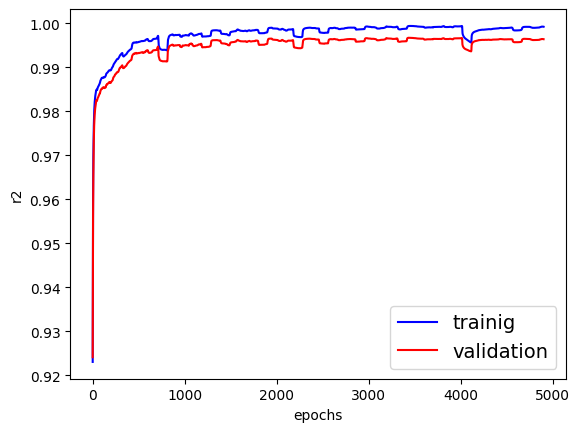

In [20]:
plt.plot(movingAvg(history_callback.history["coeff_determination"][:-1], 100), 'b-')
plt.plot(movingAvg(history_callback.history["val_coeff_determination"][:-1], 100), 'r-')
plt.rcParams.update({'font.size':14})
plt.xlabel(r'epochs')
plt.ylabel(r'r2')
plt.legend(['trainig', 'validation'])
#plt.ylim([0.5, 1.])
plt.savefig(f'./CNN_Results/CNN_M2_R2_{model.name}.png')

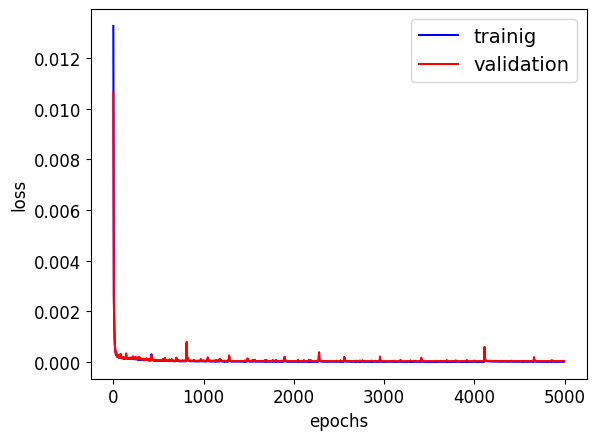

In [80]:
plt.plot(movingAvg(history_callback.history["loss"][:-1], 2), 'b-')
plt.plot(movingAvg(history_callback.history["val_loss"][:-1], 2), 'r-')
plt.rcParams.update({'font.size':14})
plt.xlabel(r'epochs')
plt.ylabel(r'loss')
plt.legend(['trainig', 'validation'])
#plt.ylim([0, 0.7])
plt.savefig(f'./CNN_Results/CNN_M2_Loss_{model.name}.png')

In [94]:
neuron = 256 #[32, 64, 128, 256]
layer = 5 #[2, 3, 4, 5]
model_s = Model(neuron, nx, ny, nf, nl, layer)
model_s.load_weights('/home/hmarefat/scratch/NECEC2023_local/CNN_checkpoints/M2_weight-1090.h5')

In [95]:
y_pred = model_s.predict(np.expand_dims(data[1,:,:,0:-1], axis=0))

1/1 [==============================] - 0s 111ms/step


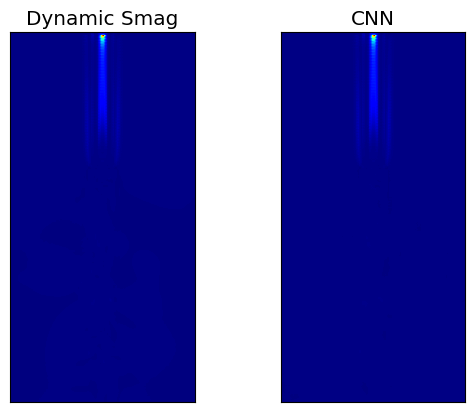

In [62]:
import matplotlib.pyplot as plt

plt.subplot(1, 2, 1)
plt.imshow(data[1,:,:,-1], cmap='jet')
plt.title('Dynamic Smag')
plt.xticks([], [])
plt.yticks([], [])
plt.subplot(1, 2, 2)
plt.imshow(y_pred[0,:,:,-1], cmap='jet')
plt.title('CNN')
plt.xticks([], [])
plt.yticks([], [])
plt.rcParams.update({'font.size':12})
plt.savefig(f'./CNN_Results/CNN_M2_CsSnapShot_{model.name}.png')

In [63]:
data[1,:,:,-1].shape, y_pred[0,:,:,-1].shape

((256, 128), (256, 128))

In [96]:
Cs_true = data[1,:,:,-1].reshape([data[1,:,:,-1].shape[0]*data[1,:,:,-1].shape[1],1])
Cs_pred = y_pred[0,:,:,-1].reshape([y_pred[0,:,:,-1].shape[0]*y_pred[0,:,:,-1].shape[1],1])

In [97]:
cc_train = CC(Cs_true, Cs_pred)
cc_train

<tf.Tensor: shape=(), dtype=float32, numpy=0.99828833>

In [90]:
Cs_true.shape, Cs_pred.shape

((32768, 1), (32768, 1))

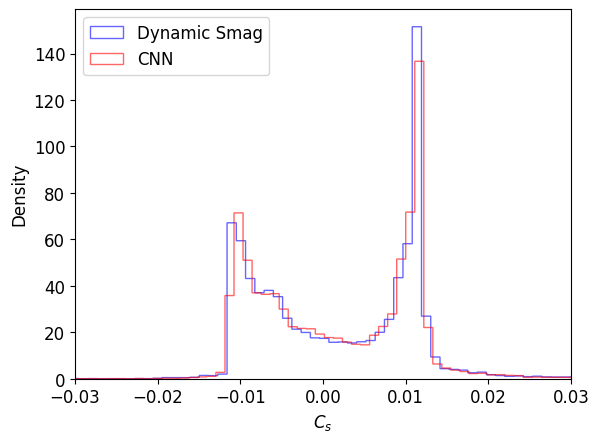

In [50]:
plt.hist(Cs_true, bins=8000, density=True, alpha=0.6, histtype=u'step', color='blue')
plt.hist(Cs_pred, bins=8000, density=True, alpha=0.6, histtype=u'step', color='red')
plt.legend(['Dynamic Smag', 'CNN'])
plt.xlabel(r'$C_s$')
plt.ylabel(r'Density')
#plt.title('Seen Data Comparison')
plt.xlim([-0.03,0.03])
plt.rcParams.update({'font.size':12})
plt.savefig(f'./CNN_Results/CNN_M2_SeenDensity_{model.name}.png')

In [112]:
y_test_pred = model_s.predict(np.expand_dims(data[-4,:,:,0:-1], axis=0))

1/1 [==============================] - 0s 19ms/step


In [113]:
idx = -4
Cs_test_true = data[idx,:,:,-1].reshape([data[idx,:,:,-1].shape[0]*data[idx,:,:,-1].shape[1],1])
Cs_test_pred = y_test_pred[0,:,:,-1].reshape([y_test_pred[0,:,:,-1].shape[0]*y_test_pred[0,:,:,-1].shape[1],1])

In [114]:
cc_test = CC(Cs_test_true, Cs_test_pred)
cc_test

<tf.Tensor: shape=(), dtype=float32, numpy=0.6218137>

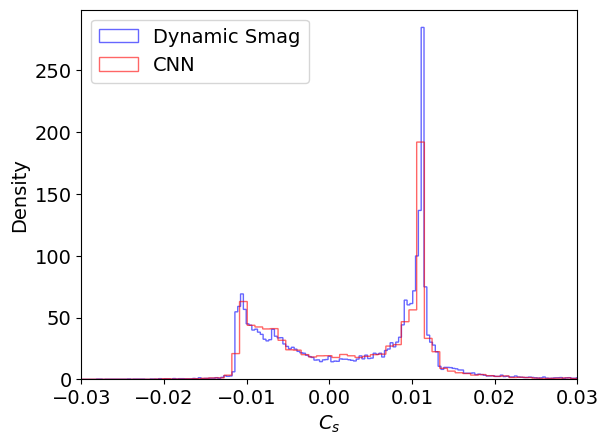

In [88]:
plt.hist(Cs_test_true, bins=4000, density=True, alpha=0.6, histtype=u'step', color='blue')
plt.hist(Cs_test_pred, bins=4000, density=True, alpha=0.6, histtype=u'step', color='red')
plt.legend(['Dynamic Smag', 'CNN'])
plt.xlabel(r'$C_s$')
plt.ylabel(r'Density')
#plt.title('Seen Data Comparison')
plt.xlim([-0.03,0.03])
plt.rcParams.update({'font.size':12})
plt.savefig(f'./CNN_Results/CNN_M2_UnSeenDensity_{model.name}.png')